In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import networkx as nx
import missingno as msno
from mlxtend.frequent_patterns import apriori, association_rules 

In [254]:
product = pd.read_csv("/Users/navin/Downloads/take_home_challenge/product.csv")
purchase_header = pd.read_csv("/Users/navin/Downloads/take_home_challenge/purchase_header.csv")
purchase_lines = pd.read_csv("/Users/navin/Downloads/take_home_challenge/purchase_lines.csv")

In [255]:
product.head()

PRODUCT_ID DEPARTMENT_NAME  HEIGHT_INCHES  WIDTH_INCHES  DEPTH_INCHES  \
0         300         Alcohol           8.50         10.63          9.94   
1         302         Alcohol           8.50         10.63          8.00   
2         303         Alcohol           9.10          7.60          5.18   
3         324         Alcohol           9.14          7.64          5.11   
4         354         Alcohol           7.92          2.87          2.87   

   WEIGHT_GRAMS  
0        4260.0  
1        4260.0  
2        3480.0  
3        3380.0  
4         801.0

In [256]:
purchase_header.head()

PURCHASE_ID    PURCHASE_DATE_TIME
0    386138354   3/25/2020 1:25:29.5
1    386699417  3/25/2020 20:24:09.2
2    386880957   3/26/2020 9:17:55.6
3    386970067  3/26/2020 11:39:41.1
4    386979474  3/26/2020 11:52:24.0

In [257]:
purchase_lines.head()

PURCHASE_ID  PRODUCT_ID  QUANTITY
0    386880957       76610       1.0
1    386880957      153106       1.0
2    386880957      154726       1.0
3    386880957      154727       1.0
4    386880957      227757       4.0

In [258]:
merged = pd.merge(purchase_lines, purchase_header)

In [259]:
product_purchase = pd.merge(merged, product, on = 'PRODUCT_ID')

In [231]:
product_purchase.head()

PURCHASE_ID  PRODUCT_ID  QUANTITY   PURCHASE_DATE_TIME DEPARTMENT_NAME  \
0    386880957       76610       1.0  3/26/2020 9:17:55.6          Snacks   
1    386880957      153106       1.0  3/26/2020 9:17:55.6            Deli   
2    386880957      154726       1.0  3/26/2020 9:17:55.6       Household   
3    386880957      154727       1.0  3/26/2020 9:17:55.6       Household   
4    386880957      227757       4.0  3/26/2020 9:17:55.6       Beverages   

   HEIGHT_INCHES  WIDTH_INCHES  DEPTH_INCHES  WEIGHT_GRAMS  
0          10.25          5.56           NaN         951.0  
1            NaN           NaN           NaN         170.0  
2            NaN           NaN           NaN           NaN  
3            NaN           NaN           NaN           NaN  
4           9.19          2.35           NaN         533.0

# Invalid Data Types
seeing if there are numeric points that are impossible (negative height, etc.)

In [260]:
product_purchase.sort_values("HEIGHT_INCHES").head()

PURCHASE_ID  PRODUCT_ID  QUANTITY    PURCHASE_DATE_TIME  \
418922    398139851    19103726       2.0  4/11/2020 10:37:16.8   
10268     390610839     2692623       1.0   4/1/2020 14:24:39.4   
254840    396088549     2692623       1.0   4/8/2020 14:09:42.6   
26464     391425500       89722       1.0   4/2/2020 18:44:38.9   
137509    391697038     2692623       1.0    4/3/2020 7:41:37.4   

       DEPARTMENT_NAME  HEIGHT_INCHES  WIDTH_INCHES  DEPTH_INCHES  \
418922       Beverages            0.0           0.0           NaN   
10268     Dairy & Eggs            0.0           0.0           NaN   
254840    Dairy & Eggs            0.0           0.0           NaN   
26464     Dairy & Eggs            0.0           0.0           NaN   
137509    Dairy & Eggs            0.0           0.0           NaN   

        WEIGHT_GRAMS  
418922        2830.0  
10268          454.0  
254840         454.0  
26464          227.0  
137509         454.0

In [261]:
product_purchase.sort_values("WIDTH_INCHES").head()

PURCHASE_ID  PRODUCT_ID  QUANTITY    PURCHASE_DATE_TIME  \
342112    397525459     2692623       1.0  4/10/2020 12:42:56.7   
443289    395416389       42998       1.0   4/7/2020 16:45:32.8   
119864    394771032       89722       1.0   4/6/2020 20:33:31.8   
119941    394772164     2692623       1.0   4/6/2020 20:37:20.0   
374520    394783730    17025209       1.0   4/6/2020 21:13:48.4   

       DEPARTMENT_NAME  HEIGHT_INCHES  WIDTH_INCHES  DEPTH_INCHES  \
342112    Dairy & Eggs            0.0           0.0           NaN   
443289    Dairy & Eggs            0.0           0.0           NaN   
119864    Dairy & Eggs            0.0           0.0           NaN   
119941    Dairy & Eggs            0.0           0.0           NaN   
374520            Deli            0.0           0.0           NaN   

        WEIGHT_GRAMS  
342112         454.0  
443289         717.0  
119864         227.0  
119941         454.0  
374520         283.0

In [262]:
product_purchase.sort_values("DEPTH_INCHES").head()

PURCHASE_ID  PRODUCT_ID  QUANTITY   PURCHASE_DATE_TIME  \
297776    393940456       14142       1.0  4/5/2020 21:52:21.3   
260557    396340282       14142       1.0   4/9/2020 2:38:07.9   
353913    392274290       14142       1.0  4/3/2020 21:50:57.0   
308552    394754495       14142       1.0  4/6/2020 19:43:56.9   
328223    396990206       14142       2.0  4/9/2020 19:12:26.9   

       DEPARTMENT_NAME  HEIGHT_INCHES  WIDTH_INCHES  DEPTH_INCHES  \
297776            Deli           7.87          3.88           0.0   
260557            Deli           7.87          3.88           0.0   
353913            Deli           7.87          3.88           0.0   
308552            Deli           7.87          3.88           0.0   
328223            Deli           7.87          3.88           0.0   

        WEIGHT_GRAMS  
297776         208.0  
260557         208.0  
353913         208.0  
308552         208.0  
328223         208.0

In [263]:
product_purchase.sort_values("WEIGHT_GRAMS").head()

PURCHASE_ID  PRODUCT_ID  QUANTITY   PURCHASE_DATE_TIME  \
258476    396273457       34594       1.0  4/8/2020 20:33:22.4   
126274    395264580       34594       1.0  4/7/2020 13:00:58.4   
164499    393526855       34594       2.0  4/5/2020 10:41:06.8   
41450     393553837       34594       1.0  4/5/2020 11:06:18.0   
278312    393212394       34594       1.0   4/5/2020 4:44:05.6   

       DEPARTMENT_NAME  HEIGHT_INCHES  WIDTH_INCHES  DEPTH_INCHES  \
258476       Beverages          10.53         13.21          4.91   
126274       Beverages          10.53         13.21          4.91   
164499       Beverages          10.53         13.21          4.91   
41450        Beverages          10.53         13.21          4.91   
278312       Beverages          10.53         13.21          4.91   

        WEIGHT_GRAMS  
258476         -27.2  
126274         -27.2  
164499         -27.2  
41450          -27.2  
278312         -27.2

plenty of values with height, width or depth of 0, or negative weight. so for now i will just replace them to consider them as missing values.

In [264]:
product_purchase.loc[(product_purchase['HEIGHT_INCHES'] <= 0) | 
                     (product_purchase['WIDTH_INCHES'] <= 0) | 
                     (product_purchase['DEPTH_INCHES'] <= 0) | 
                     (product_purchase['WEIGHT_GRAMS'] <= 0), 
                     ['HEIGHT_INCHES', 'WIDTH_INCHES', 'DEPTH_INCHES', 'WEIGHT_GRAMS']] = np.nan

product_purchase.sort_values("HEIGHT_INCHES").head()

PURCHASE_ID  PRODUCT_ID  QUANTITY    PURCHASE_DATE_TIME  \
475054    398403824       37047       1.0  4/11/2020 16:37:14.8   
75560     391072934       37047       1.0    4/2/2020 9:53:20.6   
59387     394513882       37047       1.0   4/6/2020 13:24:16.0   
61360     394538497       37047       2.0   4/6/2020 13:49:37.6   
177424    394754512       37047       1.0   4/6/2020 19:43:59.8   

       DEPARTMENT_NAME  HEIGHT_INCHES  WIDTH_INCHES  DEPTH_INCHES  \
475054          Pantry           0.12          3.43           NaN   
75560           Pantry           0.12          3.43           NaN   
59387           Pantry           0.12          3.43           NaN   
61360           Pantry           0.12          3.43           NaN   
177424          Pantry           0.12          3.43           NaN   

        WEIGHT_GRAMS  
475054        1510.0  
75560         1510.0  
59387         1510.0  
61360         1510.0  
177424        1510.0

## Missing Data Matrix

<Axes: >

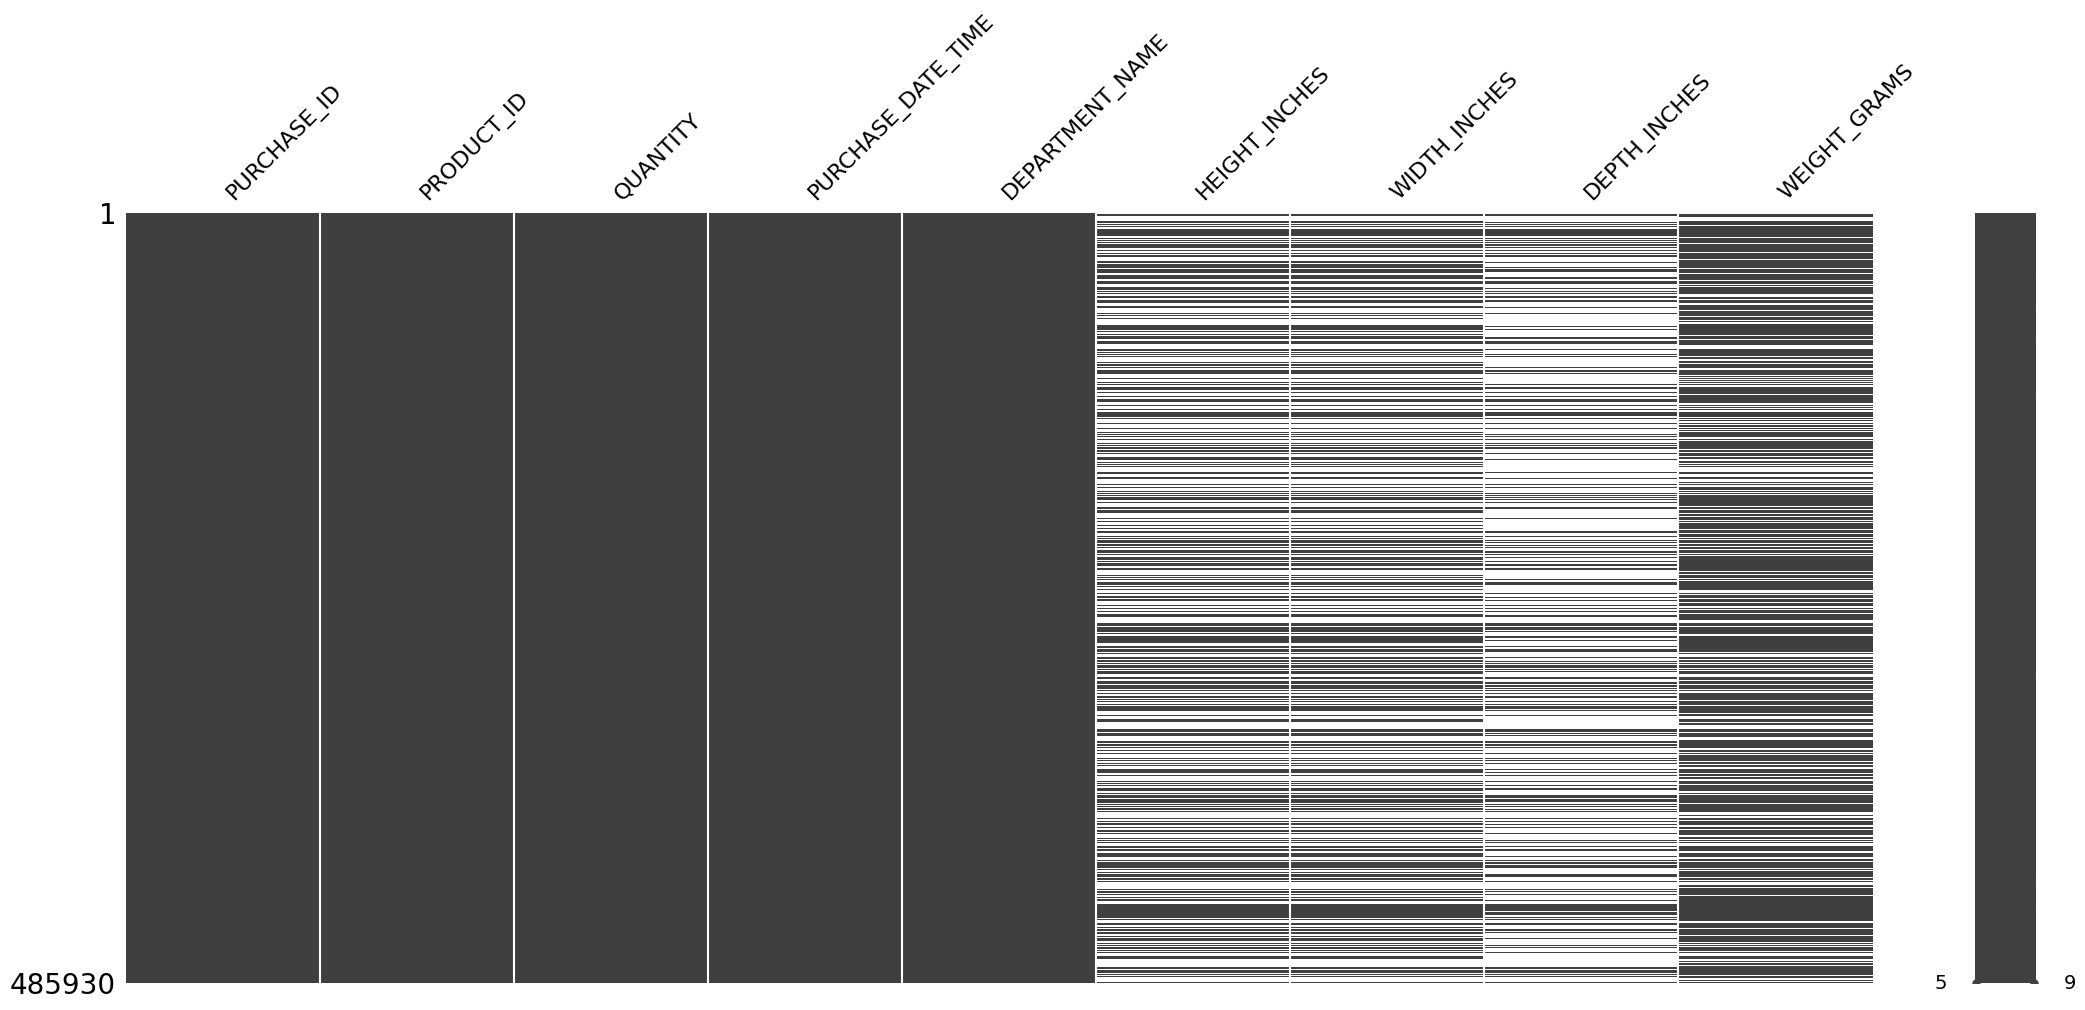

In [265]:
msno.matrix(product_purchase)

# Unique Orders

In [15]:
print(f"There are {len(product_purchase['PURCHASE_ID'].unique())} unique orders.")
print(f"There are {len(product_purchase['PRODUCT_ID'].unique())} unique products.")

There are 24285 unique orders.
There are 26821 unique products.


## Distribution of number of items per order

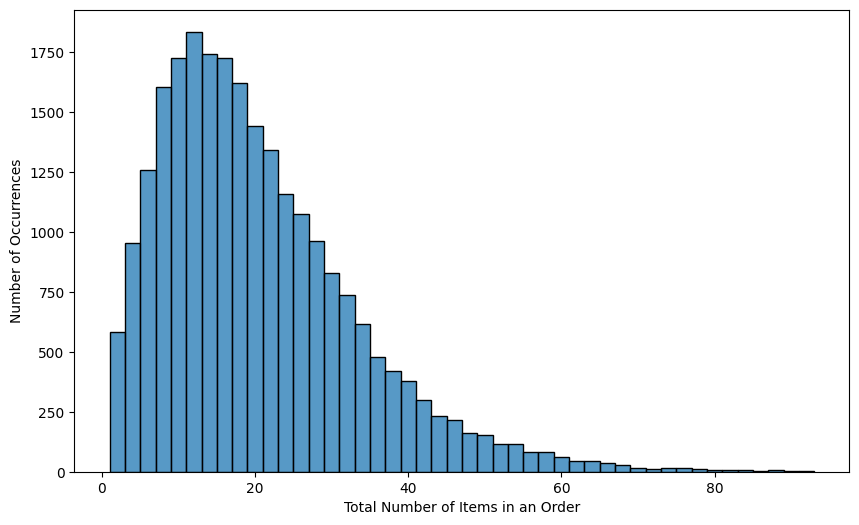

In [266]:
## most people seem to be buying between 10 and 20 items
order_counts = product_purchase.groupby('PURCHASE_ID')['QUANTITY'].count()

plt.figure(figsize=(10, 6))
sns.histplot(order_counts, bins=range(order_counts.min(), 95, 2), kde=False)
plt.xlabel("Total Number of Items in an Order")
plt.ylabel("Number of Occurrences")
plt.show()

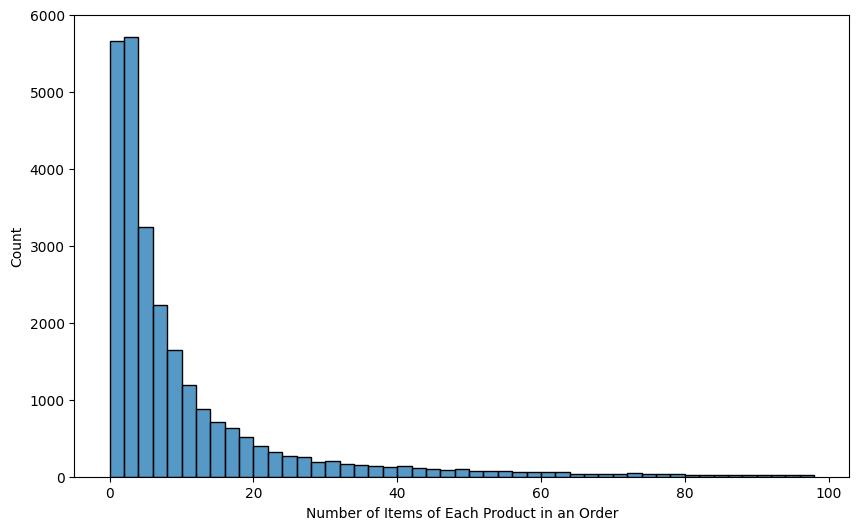

In [267]:
# most people buying between 0 and 10 of each product
product_counts = product_purchase.groupby('PRODUCT_ID')['QUANTITY'].count()

plt.figure(figsize=(10, 6))
sns.histplot(product_counts, bins=range(0, 100, 2), kde=False)
plt.xlabel("Number of Items of Each Product in an Order")
plt.show()

## Distribution of each Department Name

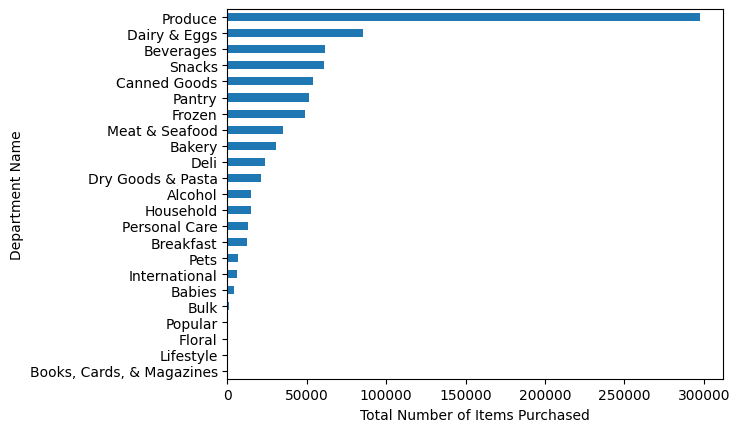

In [268]:
department_counts = product_purchase.groupby('DEPARTMENT_NAME')['QUANTITY'].sum()
department_counts = department_counts.sort_values()
department_counts.plot(kind="barh")
plt.ylabel("Department Name")
plt.xlabel("Total Number of Items Purchased")
plt.show()

In [19]:
f"{round(product_purchase[product_purchase['DEPARTMENT_NAME'] == 'Produce']['QUANTITY'].sum(), 2)} produce items were purchased."

'297469.08 produce items were purchased.'

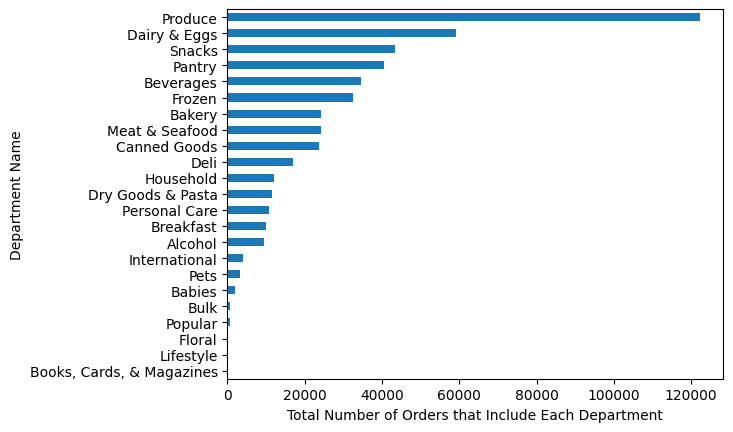

In [252]:
order_counts = product_purchase.groupby('DEPARTMENT_NAME').size()
order_counts = order_counts.sort_values()
order_counts.plot(kind="barh")
plt.ylabel("Department Name")
plt.xlabel("Total Number of Orders that Include Each Department")
plt.show()

# Distribution of Each Numerical Column

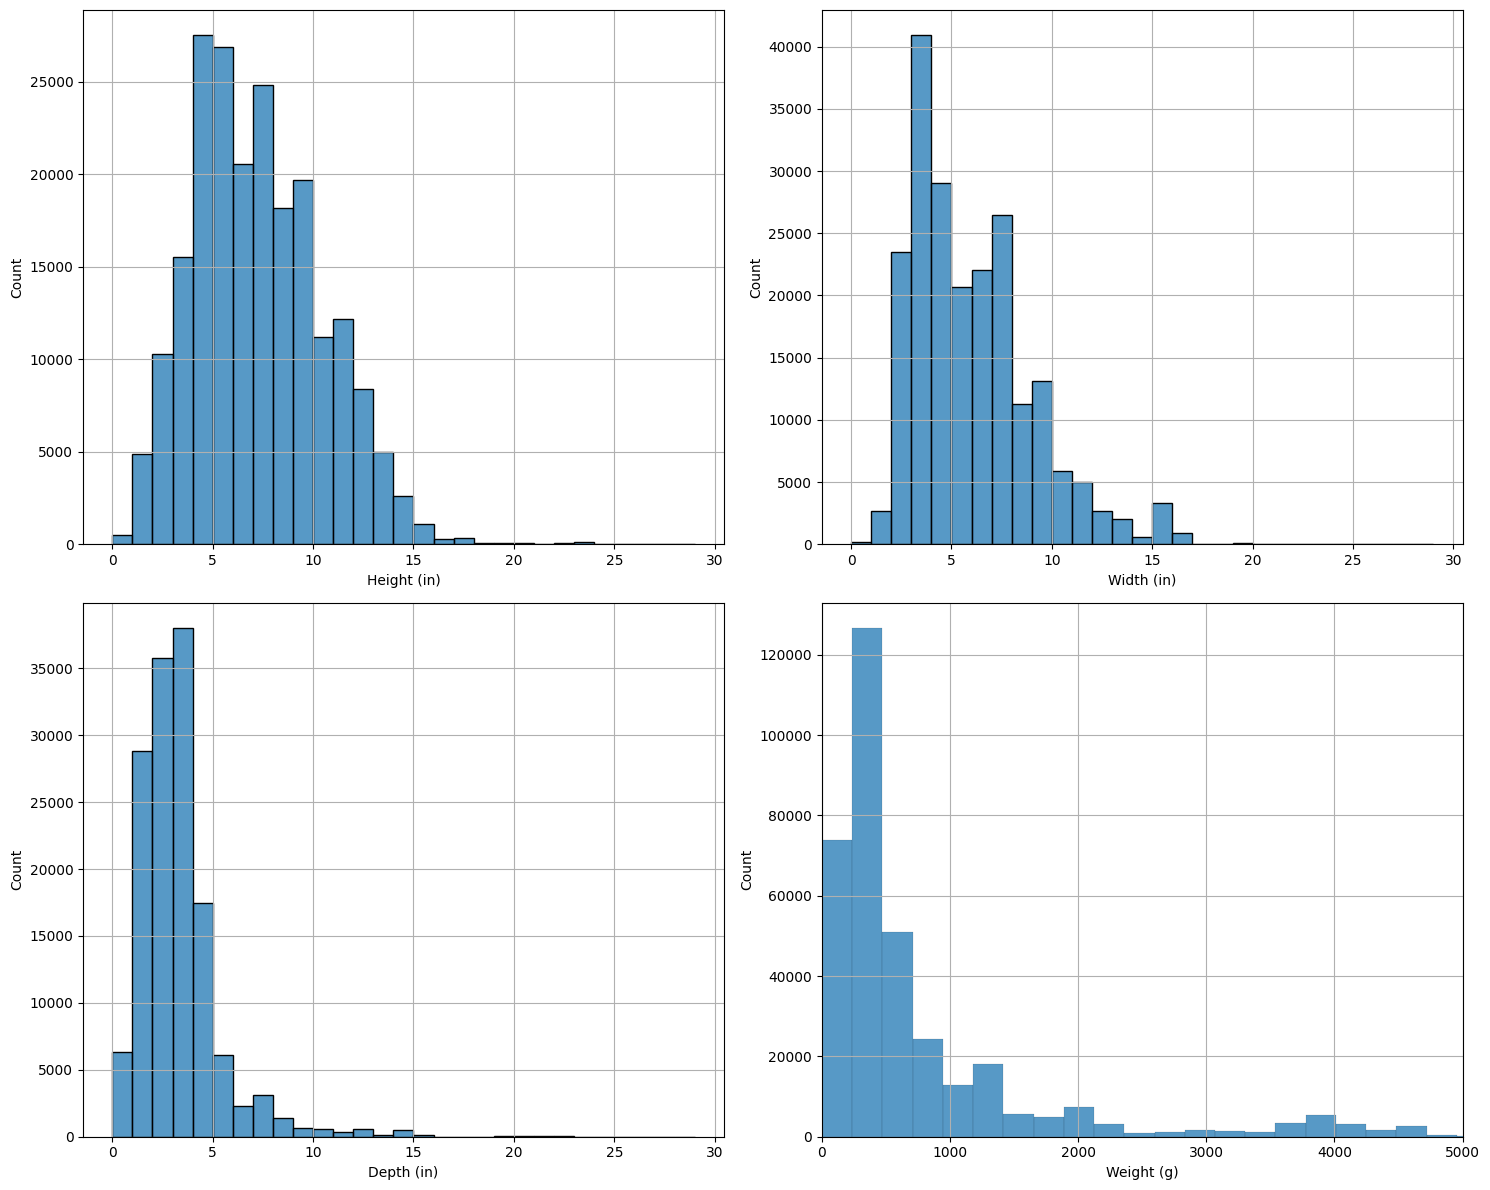

In [269]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

sns.histplot(data=product_purchase, x="HEIGHT_INCHES", bins=range(0, 30), kde=False, ax=axs[0, 0])
axs[0,0].set_xlabel("Height (in)")
axs[0,0].grid(True)

sns.histplot(data=product_purchase, x="WIDTH_INCHES", bins=range(0, 30), kde=False, ax=axs[0,1])
axs[0,1].set_xlabel("Width (in)")
axs[0,1].grid(True)

sns.histplot(data=product_purchase, x="DEPTH_INCHES", bins=range(0, 30), kde=False, ax=axs[1,0])
axs[1,0].set_xlabel("Depth (in)")
axs[1,0].grid(True)

sns.histplot(data=product_purchase, x="WEIGHT_GRAMS", bins=500, kde=False, ax=axs[1,1])
axs[1,1].set_xlabel("Weight (g)")
axs[1,1].set_xlim(0,5000)
axs[1,1].grid(True)

fig.tight_layout()
plt.show()


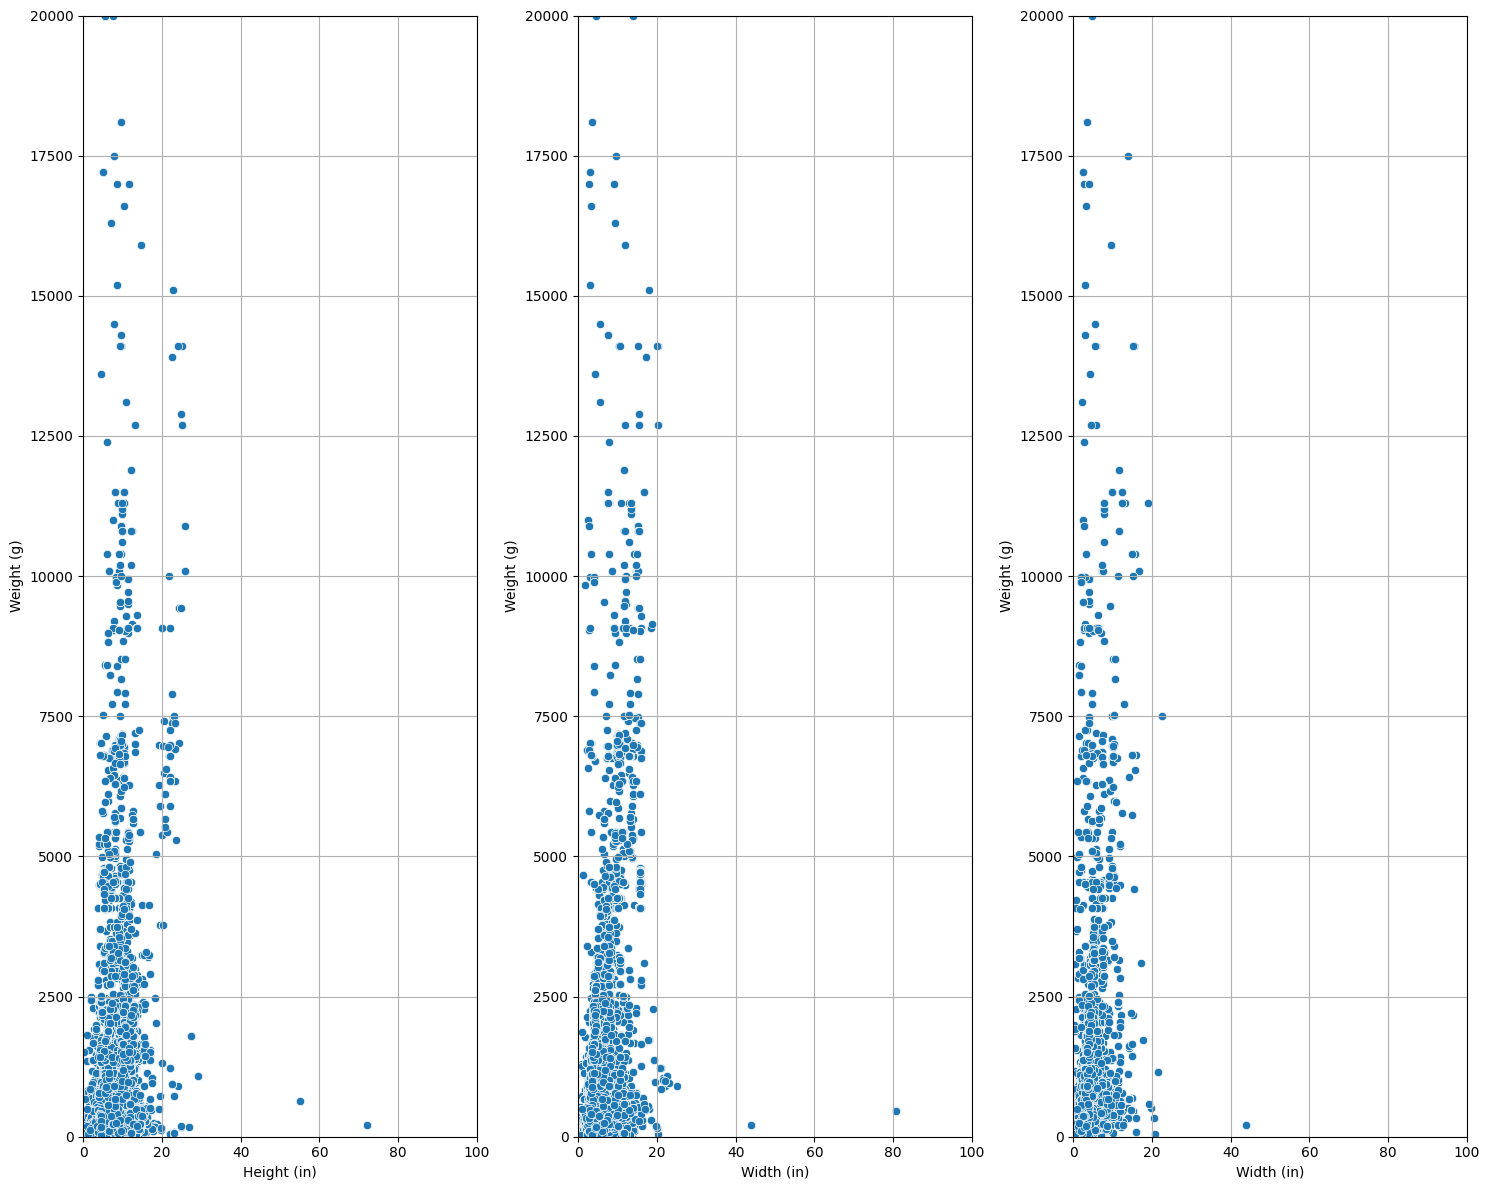

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

sns.scatterplot(data = product_purchase, x = "HEIGHT_INCHES", y = "WEIGHT_GRAMS", ax = axs[0])
axs[0].set_xlabel(r"Height (in)")
axs[0].set_ylabel("Weight (g)")
axs[0].set_xlim(0, 100) 
axs[0].set_ylim(0, 20000)
axs[0].grid(True)

sns.scatterplot(data = product_purchase, x = "WIDTH_INCHES", y = "WEIGHT_GRAMS", ax = axs[1])
axs[1].set_xlabel(r"Width (in)")
axs[1].set_ylabel("Weight (g)")
axs[1].set_xlim(0,100)
axs[1].set_ylim(0, 20000)
axs[1].grid(True)

sns.scatterplot(data = product_purchase, x = "DEPTH_INCHES", y = "WEIGHT_GRAMS", ax = axs[2])
axs[2].set_xlabel(r"Width (in)")
axs[2].set_ylabel("Weight (g)")
axs[2].set_xlim(0, 100)
axs[2].set_ylim(0, 20000)
axs[2].grid(True)

fig.tight_layout()
plt.show()

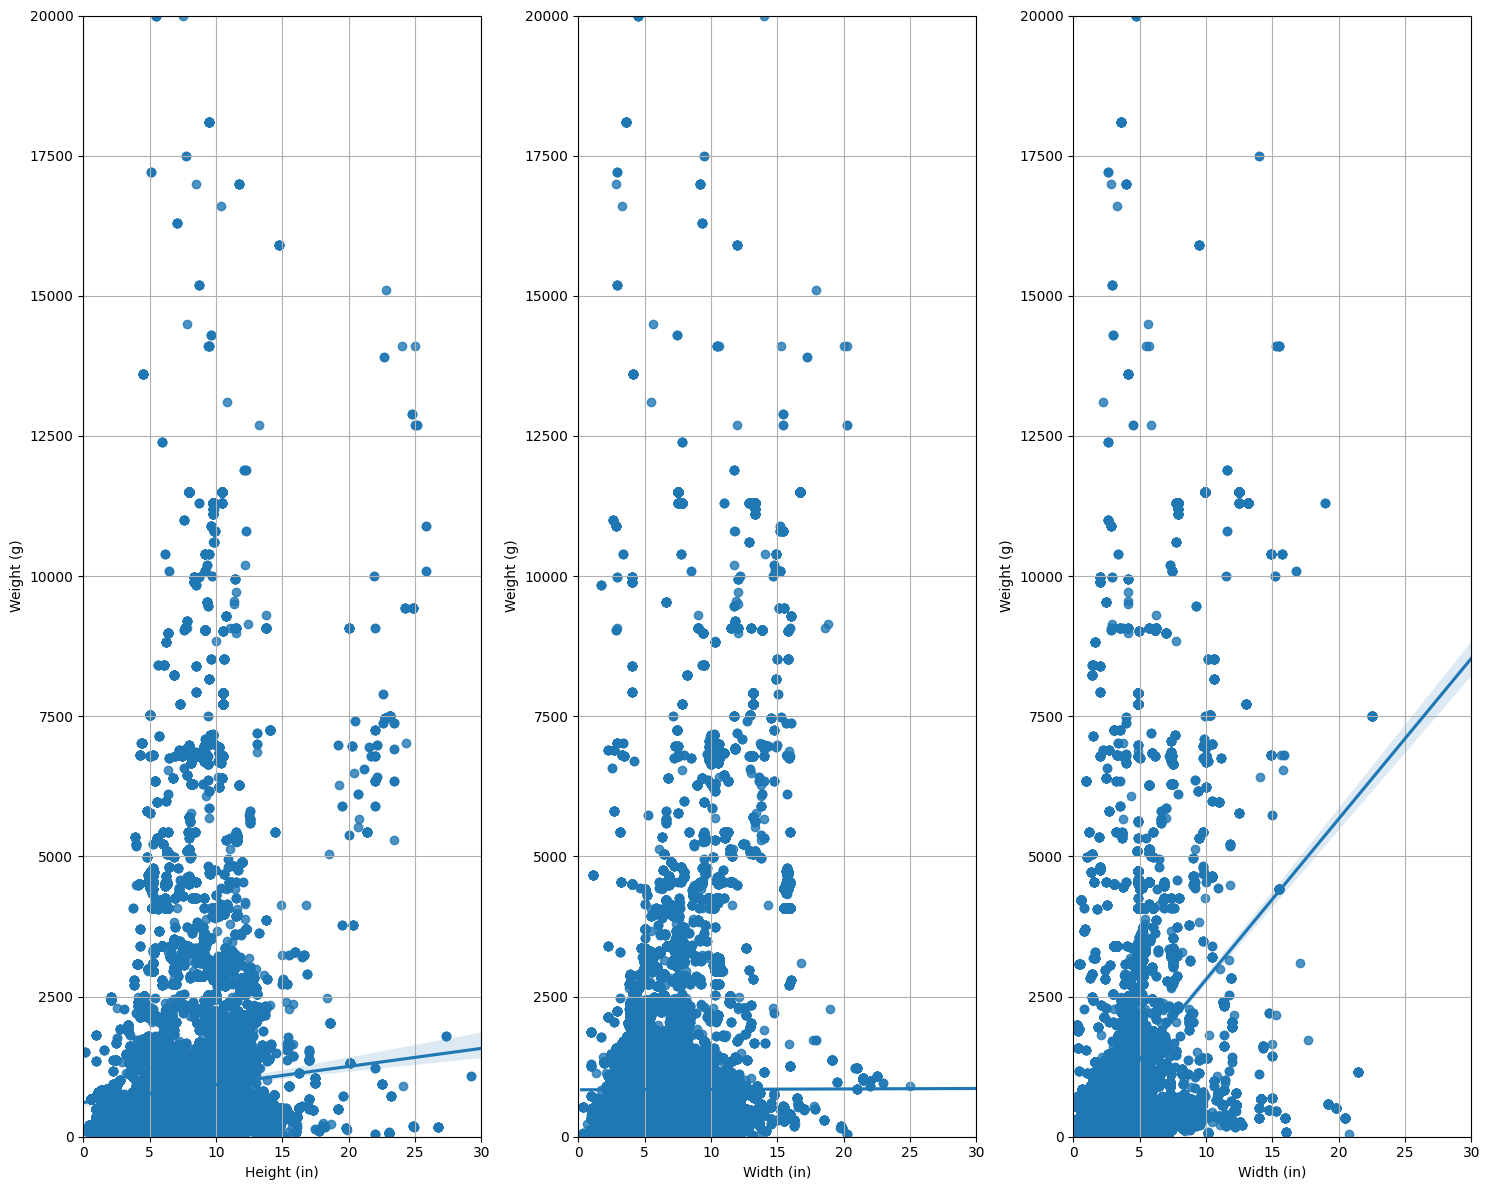

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 12))
sns.regplot(data = product_purchase, x = "HEIGHT_INCHES", y = "WEIGHT_GRAMS", ax = axs[0])
axs[0].set_xlabel(r"Height (in)")
axs[0].set_ylabel("Weight (g)")
axs[0].set_xlim(0, 30) 
axs[0].set_ylim(0, 20000)
axs[0].grid(True)
sns.regplot(data = product_purchase, x = "WIDTH_INCHES", y = "WEIGHT_GRAMS", ax = axs[1])
axs[1].set_xlabel(r"Width (in)")
axs[1].set_ylabel("Weight (g)")
axs[1].set_xlim(0,30)
axs[1].set_ylim(0, 20000)
axs[1].grid(True)
sns.regplot(data = product_purchase, x = "DEPTH_INCHES", y = "WEIGHT_GRAMS", ax = axs[2])
axs[2].set_xlabel(r"Width (in)")
axs[2].set_ylabel("Weight (g)")
axs[2].set_xlim(0, 30)
axs[2].set_ylim(0, 20000)
axs[2].grid(True)
fig.tight_layout()  
plt.show()


## Side-by-side Boxplots of Department Names vs. Weight

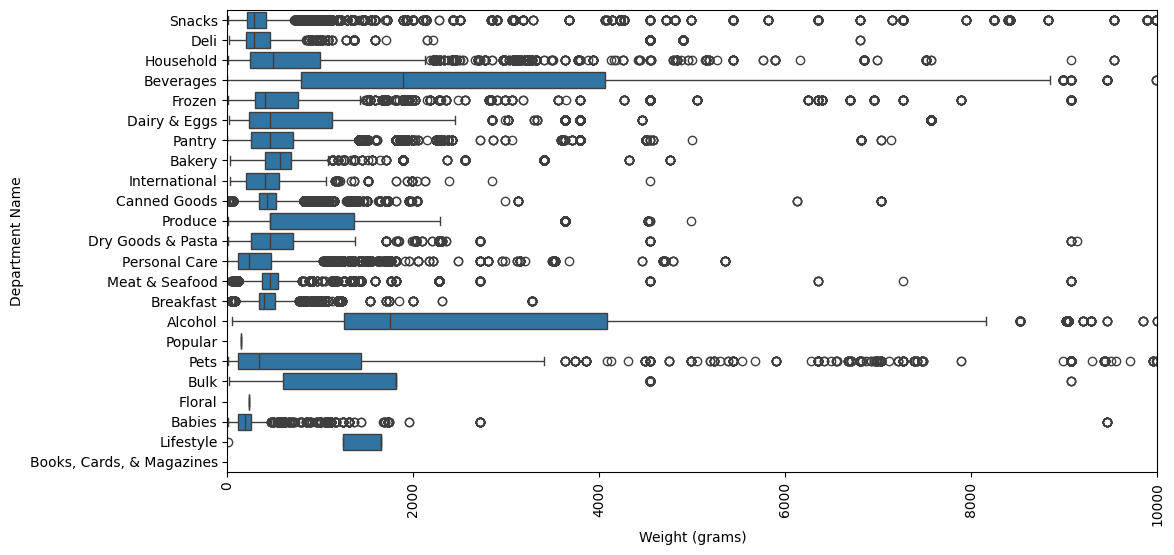

In [24]:
# heaviest items are beverages and alcohol
# one dairy order at 120,000
# one frozen item around 70,000
# few outliers around 30,000
plt.figure(figsize = (12,6))
plt.xlim(0, 10000) # ignoring outliers, getting a closer look at the boxes
sns.boxplot(data = product_purchase, x = "WEIGHT_GRAMS", y = "DEPARTMENT_NAME")
plt.xticks(rotation=90)
plt.ylabel("Department Name")
plt.xlabel("Weight (grams)")
plt.show()

## Distribution of Dates and Times

In [25]:
product_purchase['PURCHASE_DATE_TIME'] = pd.to_datetime(product_purchase['PURCHASE_DATE_TIME'])
product_purchase["PURCHASE_DATE"] = product_purchase["PURCHASE_DATE_TIME"].dt.date
product_purchase["PURCHASE_TIME"] = product_purchase["PURCHASE_DATE_TIME"].dt.time

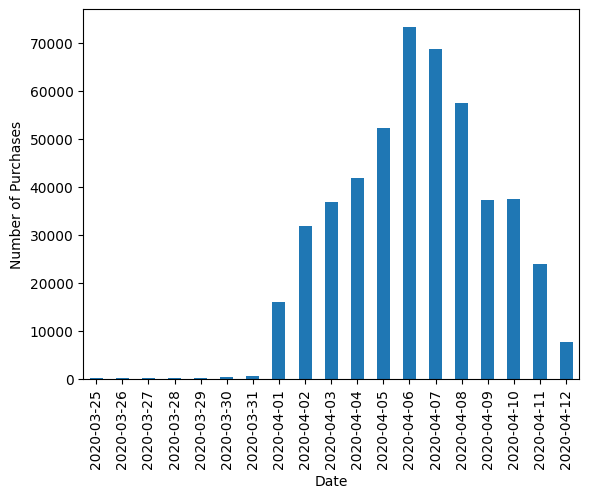

In [26]:
# many more orders in early april, peaking at the 7th and 8th
date_counts = product_purchase["PURCHASE_DATE"].value_counts().sort_index()
date_counts.plot(kind="bar")

plt.xlabel("Date")
plt.ylabel("Number of Purchases")
plt.show()

In [27]:
# day of the week column
product_purchase["DAY_OF_WEEK"] = product_purchase["PURCHASE_DATE_TIME"].dt.dayofweek

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
product_purchase["DAY_OF_WEEK"] = product_purchase["DAY_OF_WEEK"].map(day_names)

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
product_purchase["DAY_OF_WEEK"] = pd.Categorical(product_purchase["DAY_OF_WEEK"], categories=ordered_days, ordered=True)

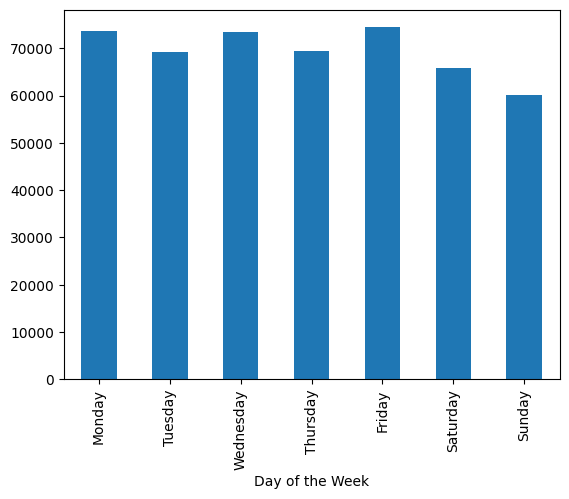

In [28]:
# day of the week plot
date_counts = product_purchase["DAY_OF_WEEK"].value_counts().sort_index()
date_counts.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.show()

In [29]:
most_popular = department_counts.sort_values(ascending=False).head(10)
top_10_depts = most_popular.index.tolist()
most_pop_depts = product_purchase[product_purchase["DEPARTMENT_NAME"].isin(top_10_depts)]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1600x1000 with 0 Axes>

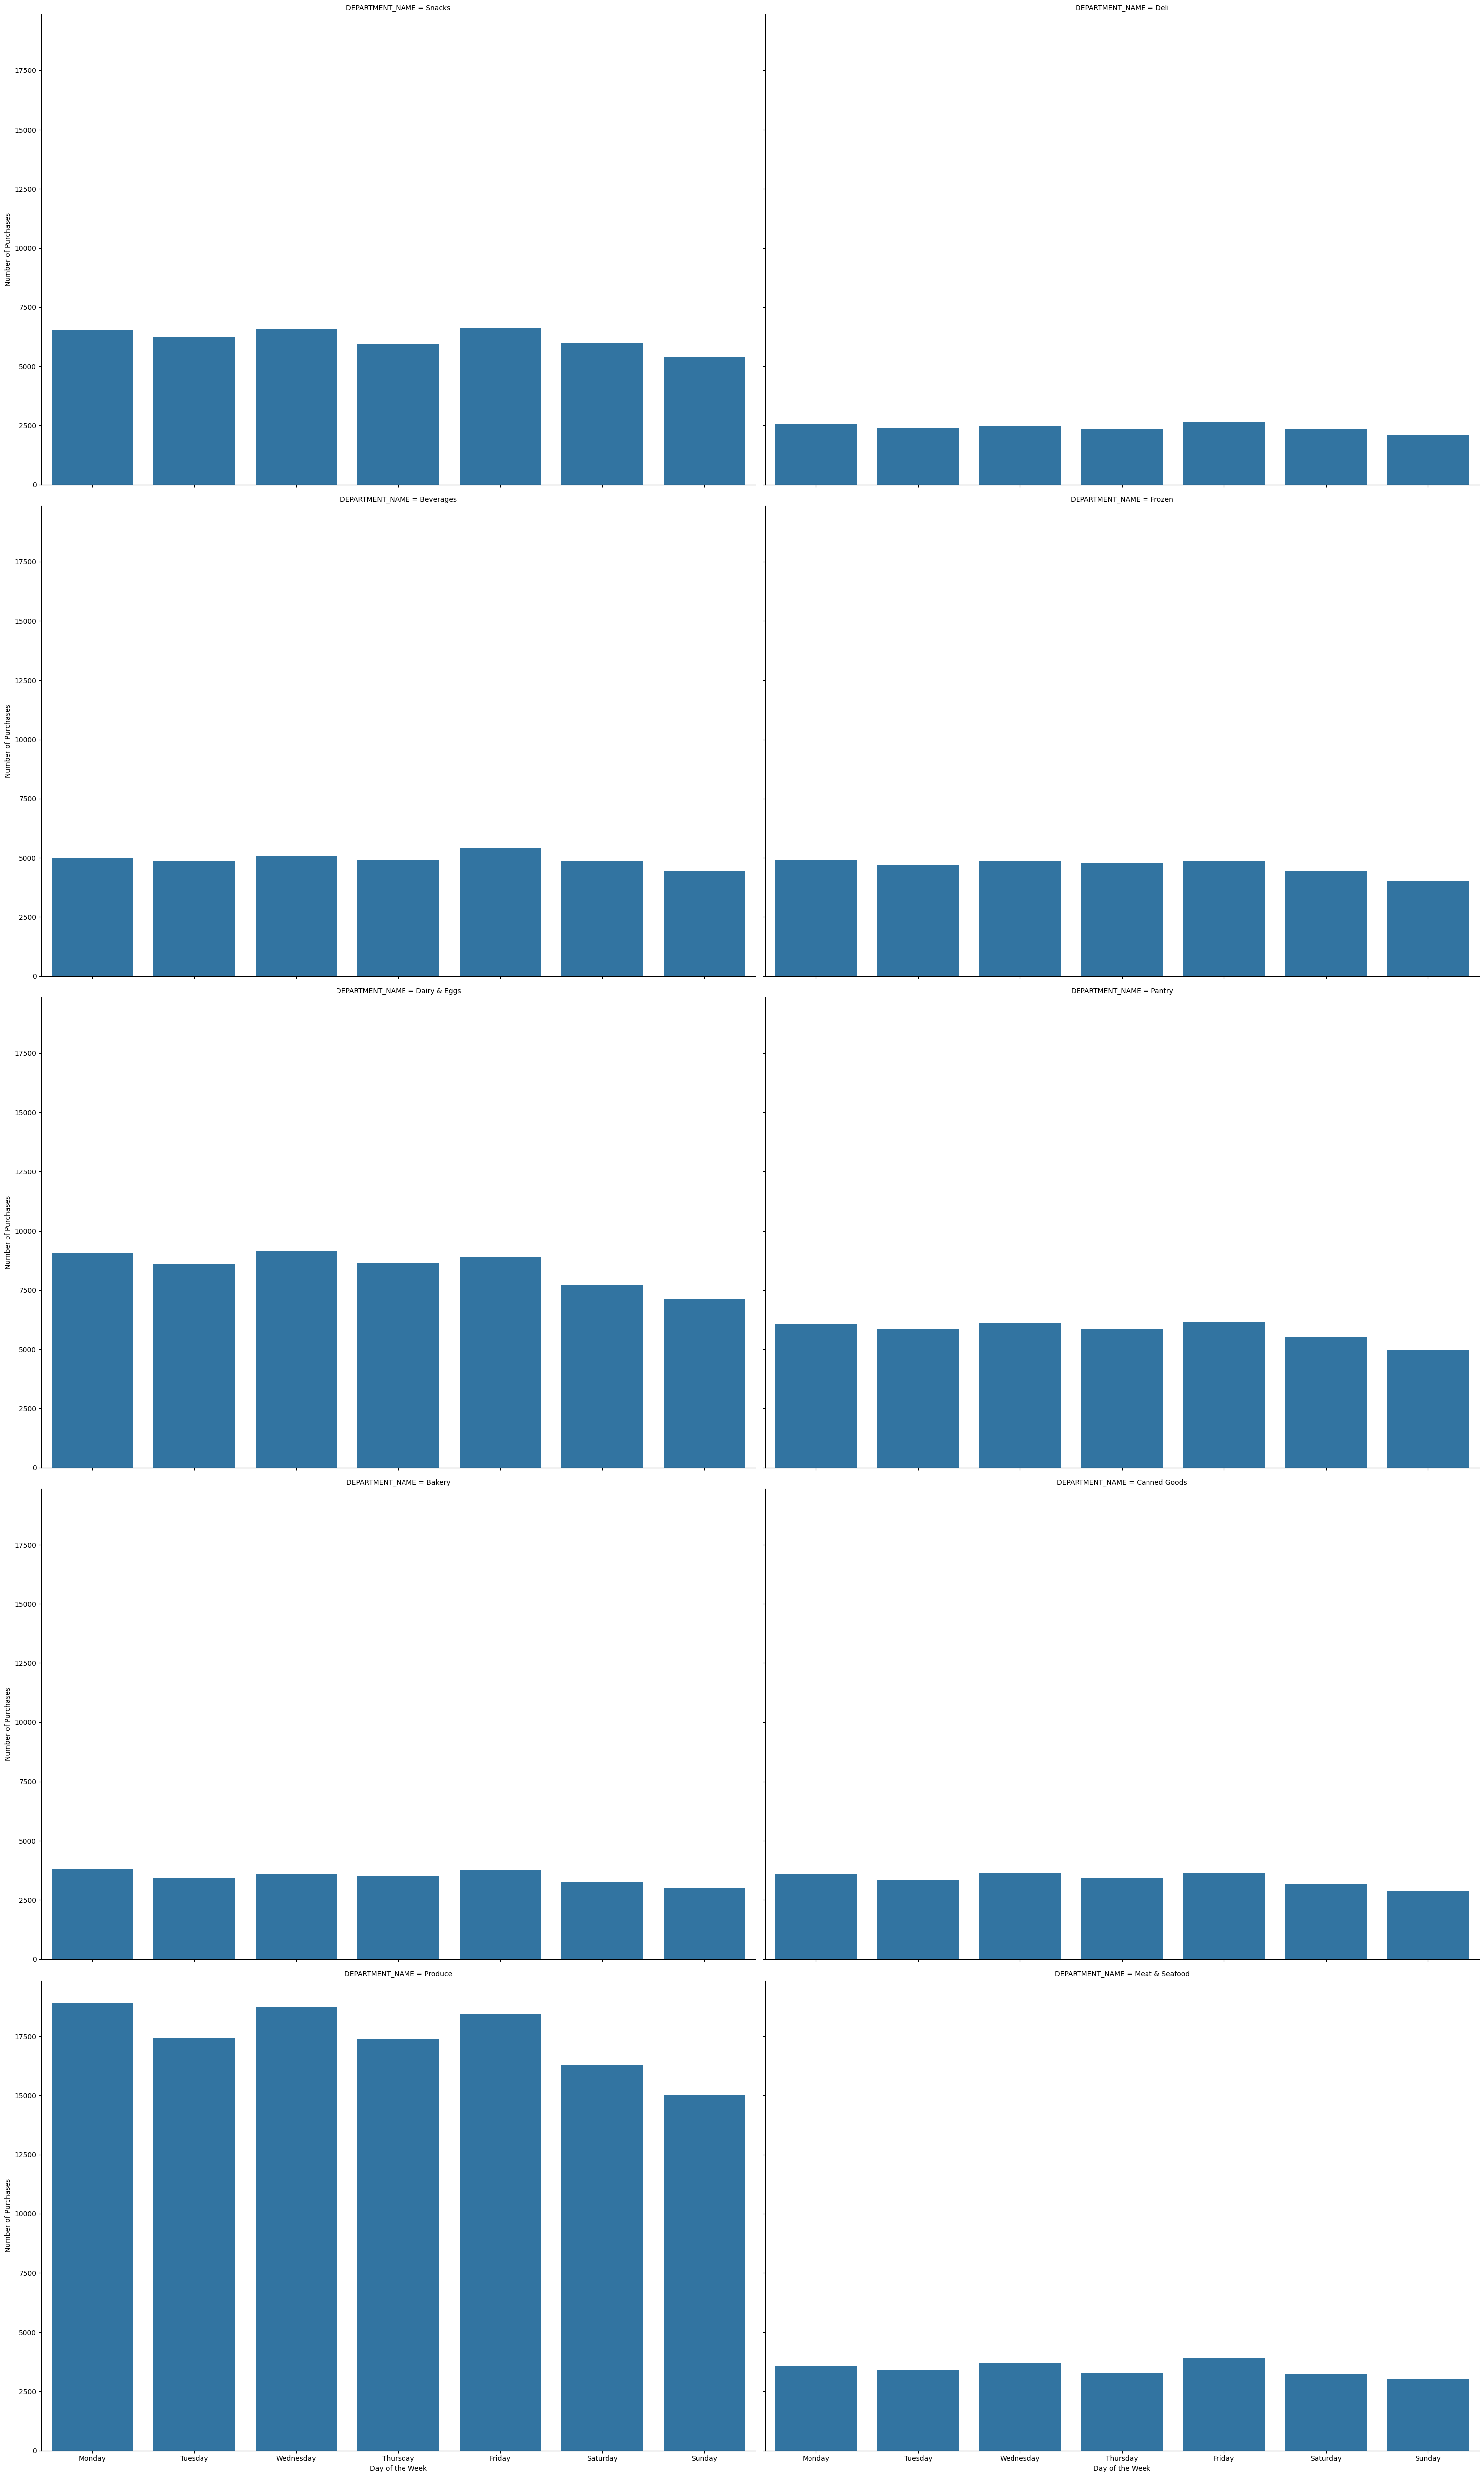

In [30]:
# pretty closely resembles the overall distribution, would have thought some departments are more popular on certain days
plt.figure(figsize=(16,10))
g = sns.FacetGrid(most_pop_depts, col="DEPARTMENT_NAME", col_wrap=2, height=10, aspect=1.5, palette='pastel')
g.map(sns.countplot, "DAY_OF_WEEK")
g.set_axis_labels("Day of the Week", "Number of Purchases")
plt.show()

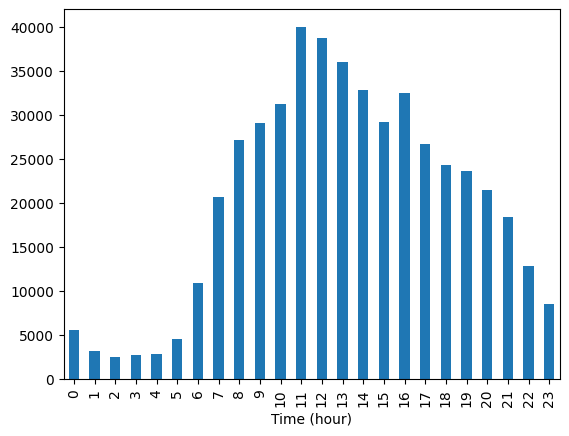

In [31]:
# most common times are late morning to early afternoon, as expected
hour_counts = product_purchase["PURCHASE_TIME"].astype(str).str[:2].astype(int).value_counts().sort_index()
hour_counts.plot(kind="bar")
plt.xlabel("Time (hour)")
plt.show()

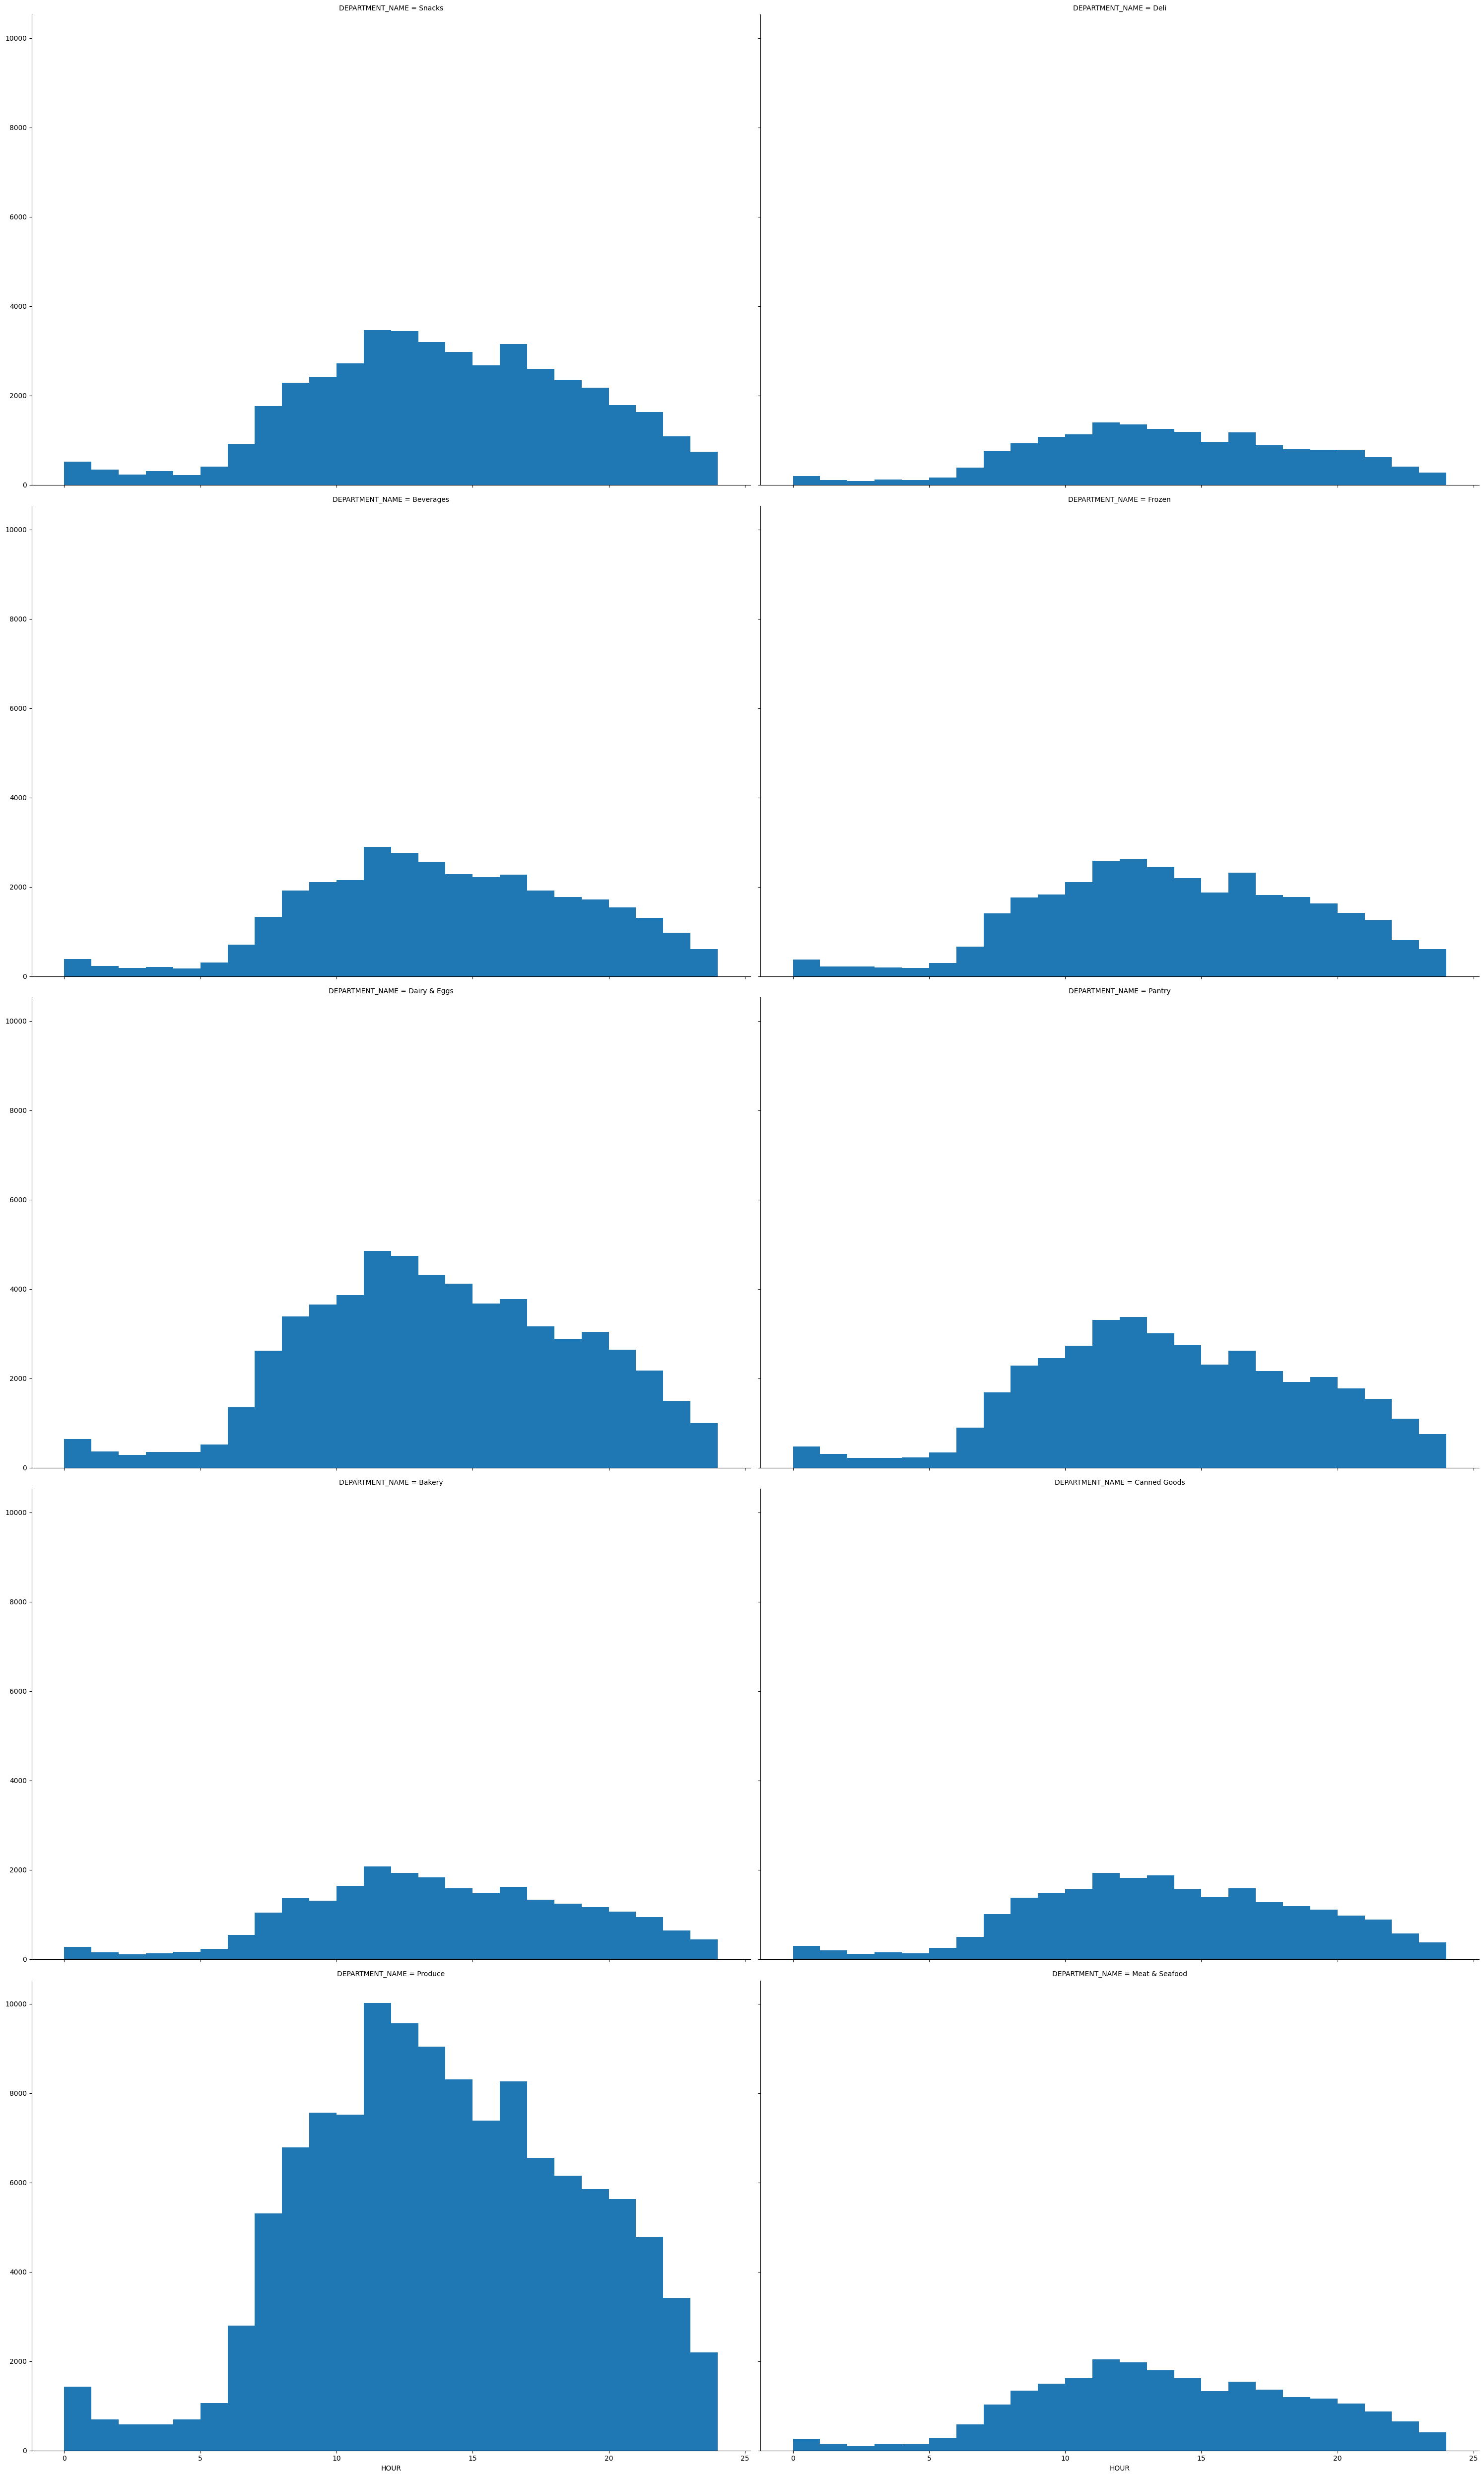

In [32]:
most_pop_depts['HOUR'] = most_pop_depts['PURCHASE_TIME'].astype(str).str[:2].astype(int)
g = sns.FacetGrid(most_pop_depts, col="DEPARTMENT_NAME", col_wrap=2, height=10, aspect=1.5)
g.map(plt.hist, "HOUR", bins=24, range=(0, 24), linewidth=2)
plt.show()

unfortunately, there arent any specific departments that have specific times where they are more popular.

## Creating a Volume Column

In [33]:
product_purchase["VOLUME_INCHES"] = product_purchase["HEIGHT_INCHES"] * product_purchase["WIDTH_INCHES"] * product_purchase["DEPTH_INCHES"]

## Distribution of Volume

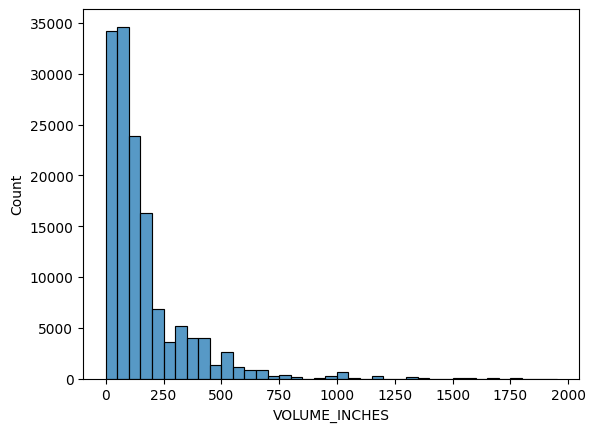

In [34]:
# skewed towards 0
sns.histplot(data=product_purchase, x="VOLUME_INCHES", bins=range(0,2000,50), kde=False)
plt.show()

### side by side boxplot of volume of each department

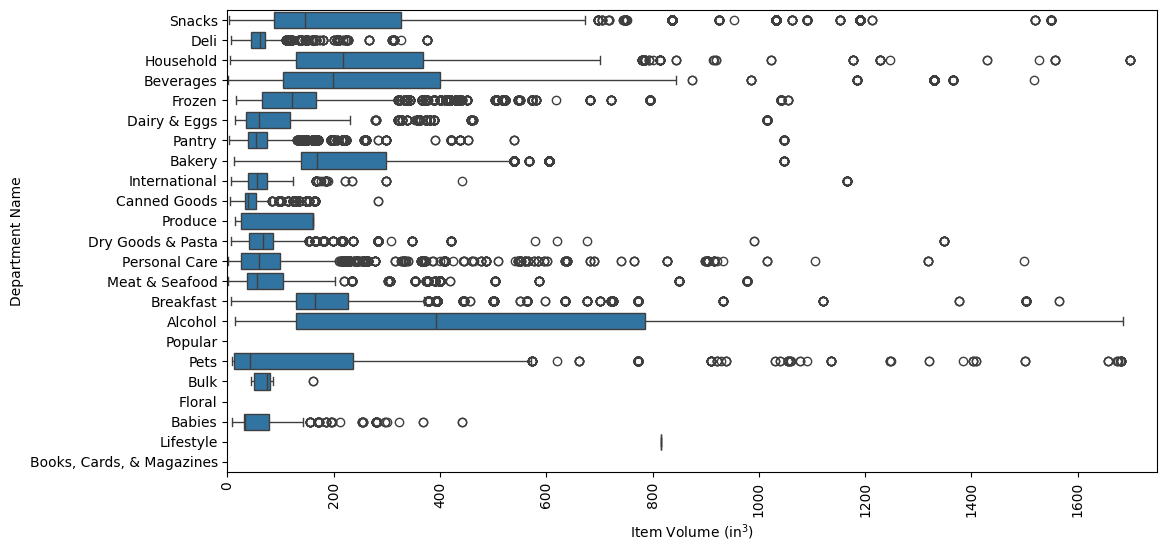

In [35]:
# alcohol is the most voluminous item
plt.figure(figsize = (12,6))

sns.boxplot(data = product_purchase, x = "VOLUME_INCHES", y = "DEPARTMENT_NAME")
plt.xlim(0, 1750) # ignoring outliers, getting a closer look at the boxes
plt.xticks(rotation=90)
plt.ylabel("Department Name")
plt.xlabel(r"Item Volume (in$^3$)")
plt.show()

#### Relationships between dimensions and volume

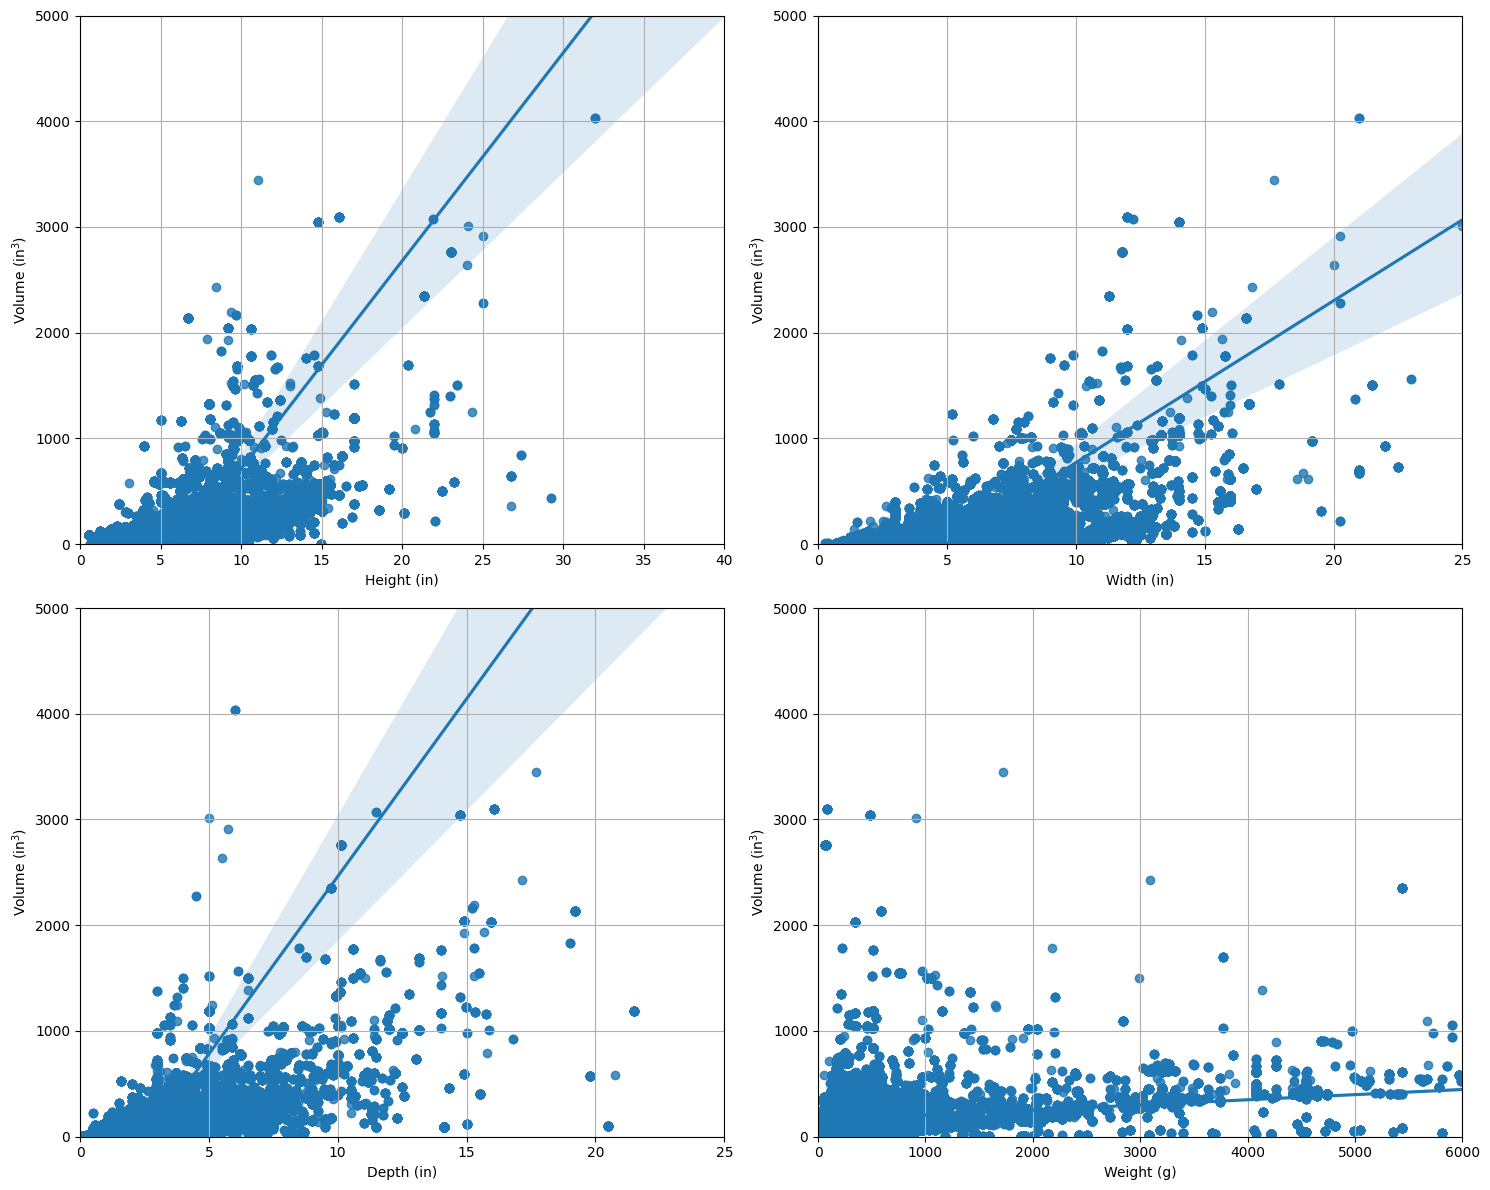

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
sns.regplot(data = product_purchase, x = "HEIGHT_INCHES", y = "VOLUME_INCHES", ax = axs[0, 0])
axs[0, 0].set_xlabel(r"Height (in)")
axs[0, 0].set_ylabel(r"Volume (in$^3$)")
axs[0, 0].set_xlim(0, 40) 
axs[0, 0].set_ylim(0, 5000)
axs[0, 0].grid(True)
sns.regplot(data = product_purchase, x = "WIDTH_INCHES", y = "VOLUME_INCHES", ax = axs[0,1])
axs[0, 1].set_xlabel(r"Width (in)")
axs[0, 1].set_ylabel(r"Volume (in$^3$)")
axs[0, 1].set_xlim(0,25)
axs[0, 1].set_ylim(0, 5000)
axs[0, 1].grid(True)
sns.regplot(data = product_purchase, x = "DEPTH_INCHES", y = "VOLUME_INCHES", ax = axs[1,0])
axs[1, 0].set_xlabel(r"Depth (in)")
axs[1, 0].set_ylabel(r"Volume (in$^3$)")
axs[1, 0].set_xlim(0, 25)
axs[1, 0].set_ylim(0, 5000)
axs[1, 0].grid(True)
sns.regplot(data = product_purchase, x = "WEIGHT_GRAMS", y = "VOLUME_INCHES", ax = axs[1,1])
axs[1, 1].set_xlabel(r"Weight (g)")
axs[1, 1].set_ylabel(r"Volume (in$^3$)")
axs[1, 1].set_xlim(0, 6000) 
axs[1, 1].set_ylim(0, 5000)
axs[1, 1].grid(True)
fig.tight_layout()

no significant trend between height/weight/depth/volume and weight

# Density Column

In [37]:
product_purchase["VOLUME_CM"] = product_purchase["VOLUME_INCHES"] * 16.387
product_purchase["DENSITY"] = product_purchase["WEIGHT_GRAMS"] / product_purchase["VOLUME_CM"]

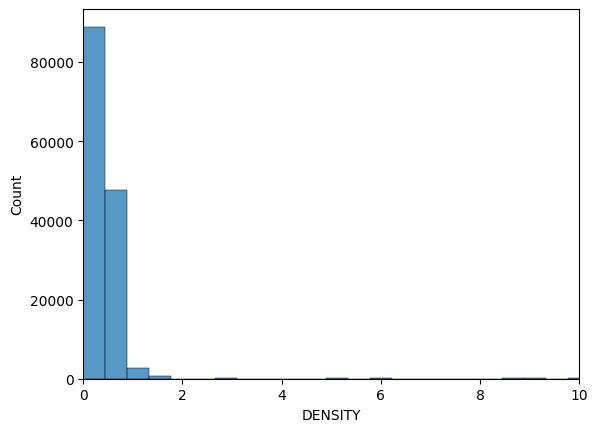

In [38]:
# significantly more data towards 0
sns.histplot(data=product_purchase, x="DENSITY", bins=100, kde=False)
plt.xlim(0,10)
plt.show()

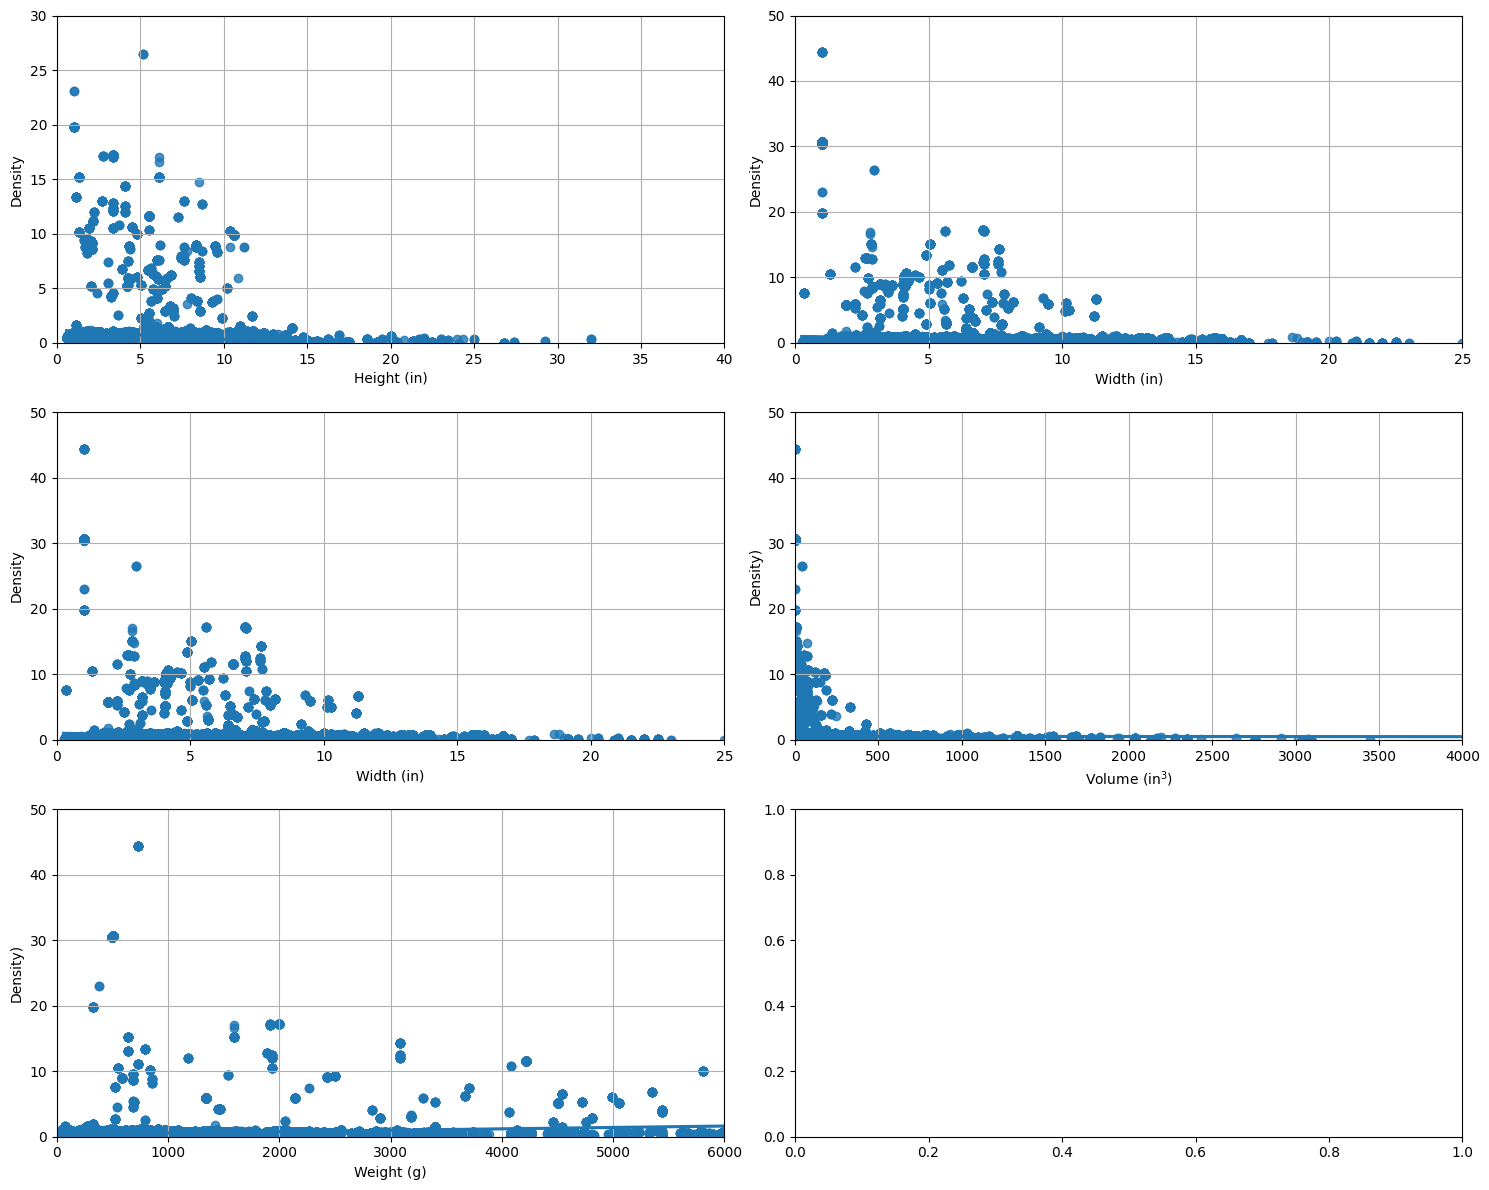

In [39]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

product_purchase_clean = product_purchase.dropna(subset=['HEIGHT_INCHES', 'DENSITY'])


sns.regplot(data = product_purchase, x = "HEIGHT_INCHES", y = "DENSITY", ax = axs[0, 0])
axs[0, 0].set_xlabel(r"Height (in)")
axs[0, 0].set_ylabel("Density")
axs[0, 0].set_xlim(0, 40) 
axs[0, 0].set_ylim(0, 30)
axs[0, 0].grid(True)

sns.regplot(data = product_purchase, x = "WIDTH_INCHES", y = "DENSITY", ax = axs[0,1])
axs[0, 1].set_xlabel(r"Width (in)")
axs[0, 1].set_ylabel("Density")
axs[0, 1].set_xlim(0,25)
axs[0, 1].set_ylim(0, 50)
axs[0, 1].grid(True)

sns.regplot(data = product_purchase, x = "WIDTH_INCHES", y = "DENSITY", ax = axs[1,0])
axs[1, 0].set_xlabel(r"Width (in)")
axs[1, 0].set_ylabel("Density")
axs[1, 0].set_xlim(0, 25)
axs[1, 0].set_ylim(0, 50)
axs[1, 0].grid(True)

sns.regplot(data = product_purchase, x = "VOLUME_INCHES", y = "DENSITY", ax = axs[1,1])
axs[1, 1].set_xlabel(r"Volume (in$^3$)")
axs[1, 1].set_ylabel("Density)")
axs[1, 1].set_xlim(0, 4000) 
axs[1, 1].set_ylim(0, 50)
axs[1, 1].grid(True)

sns.regplot(data = product_purchase, x = "WEIGHT_GRAMS", y = "DENSITY", ax = axs[2,0])
axs[2, 0].set_xlabel("Weight (g)")
axs[2, 0].set_ylabel("Density)")
axs[2, 0].set_xlim(0, 6000) 
axs[2, 0].set_ylim(0, 50)
axs[2, 0].grid(True)

fig.tight_layout()
plt.show()

height and weight are negatively correlated with density.

# Imputing Missing Values
(wanted to get a look of data earlier before Imputing)

In [40]:
department_dims = product_purchase[["DEPARTMENT_NAME", "HEIGHT_INCHES", "WIDTH_INCHES", "DEPTH_INCHES", "WEIGHT_GRAMS"]]
department_medians = department_dims.groupby("DEPARTMENT_NAME").transform("median")

# imputing with the mean of each department
imputed = product_purchase.copy()
imputed["HEIGHT_INCHES"] = imputed["HEIGHT_INCHES"].fillna(department_medians["HEIGHT_INCHES"])
imputed["WIDTH_INCHES"] = imputed["WIDTH_INCHES"].fillna(department_medians["WIDTH_INCHES"])
imputed["DEPTH_INCHES"] = imputed["DEPTH_INCHES"].fillna(department_medians["DEPTH_INCHES"])
imputed["WEIGHT_GRAMS"] = imputed["WEIGHT_GRAMS"].fillna(department_medians["WEIGHT_GRAMS"])

# imputed volume column
imputed["VOLUME_INCHES"] = imputed["HEIGHT_INCHES"] * imputed["WIDTH_INCHES"] * imputed["DEPTH_INCHES"]

# imputed density column
imputed["VOLUME_CM"] = imputed["VOLUME_INCHES"] * 16.387

imputed["DENSITY"] = imputed["WEIGHT_GRAMS"] / imputed["VOLUME_CM"]

<Axes: >

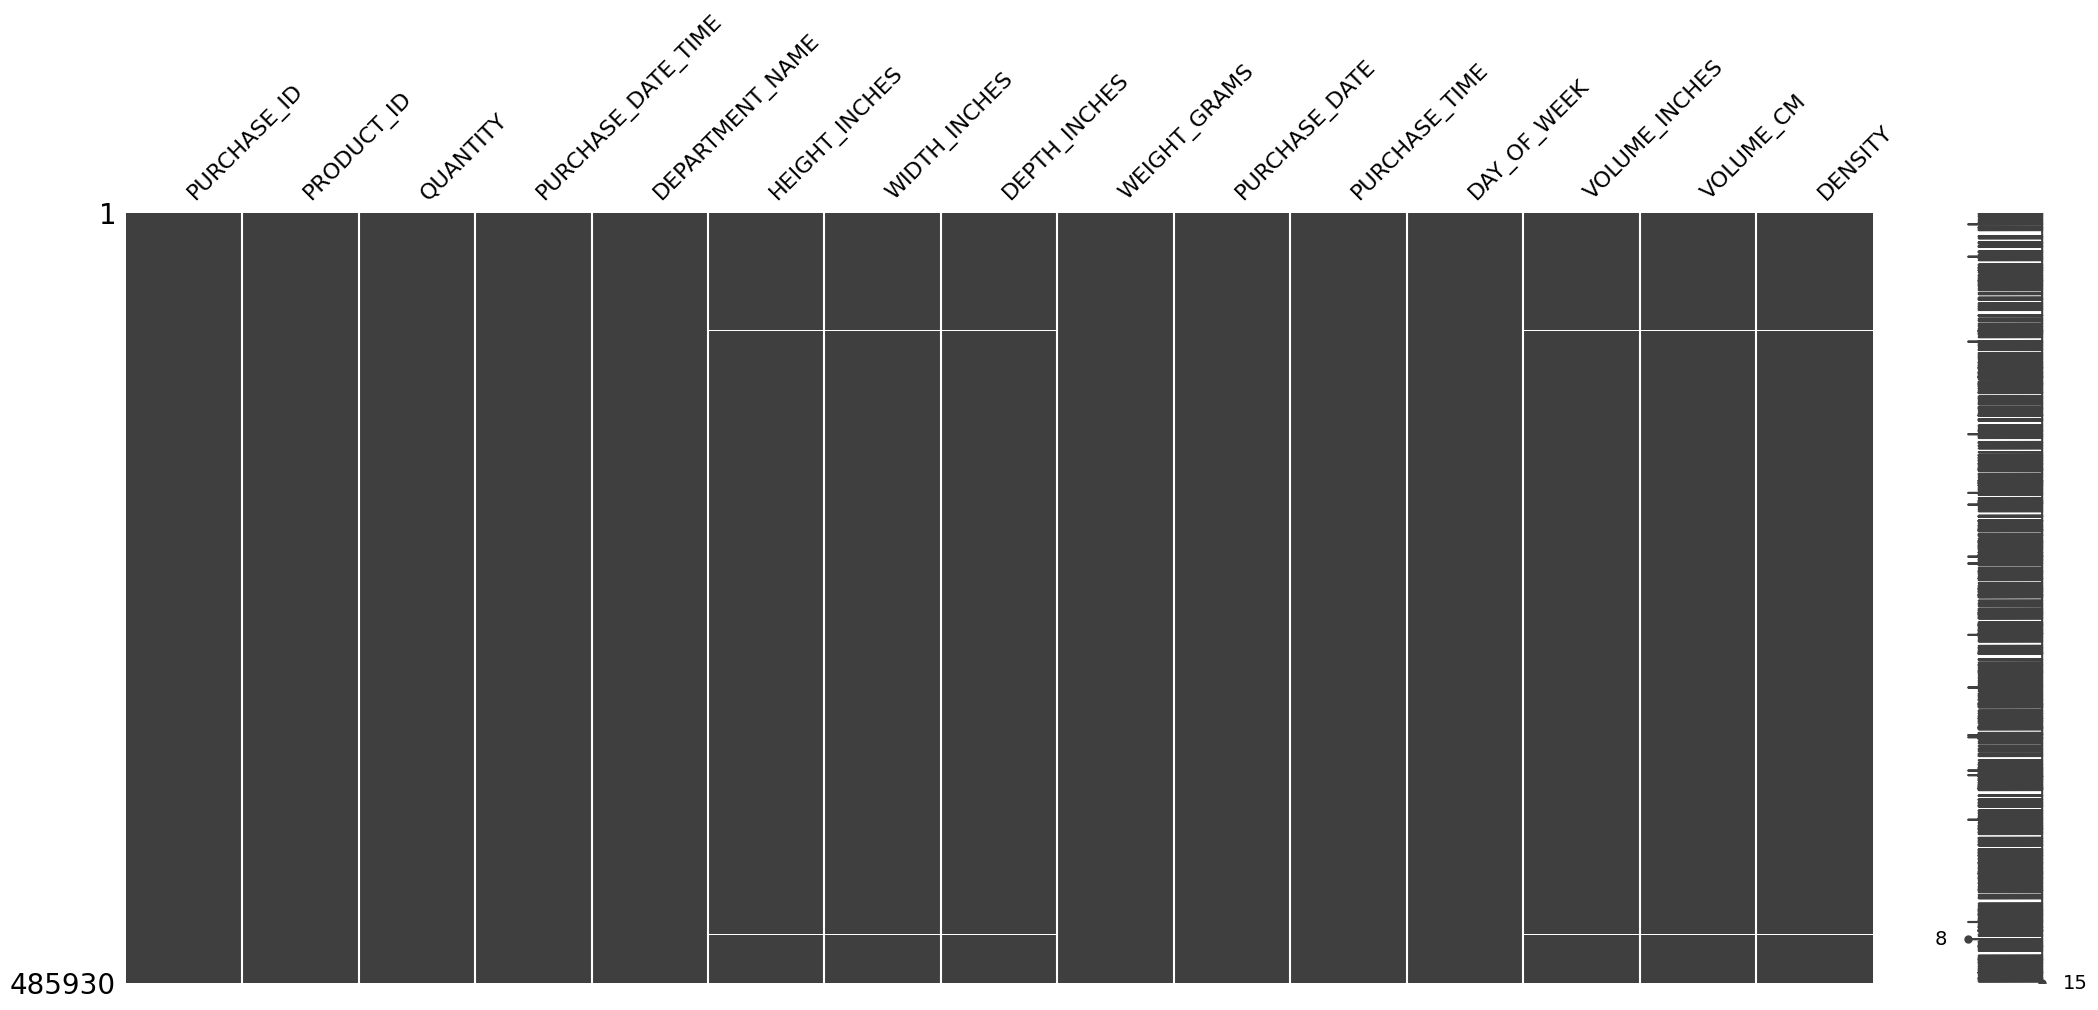

In [41]:
msno.matrix(imputed)

Books, Cards, & Magazines, Floral, and Popular have no dimensions, so after imputing there are still missing values.

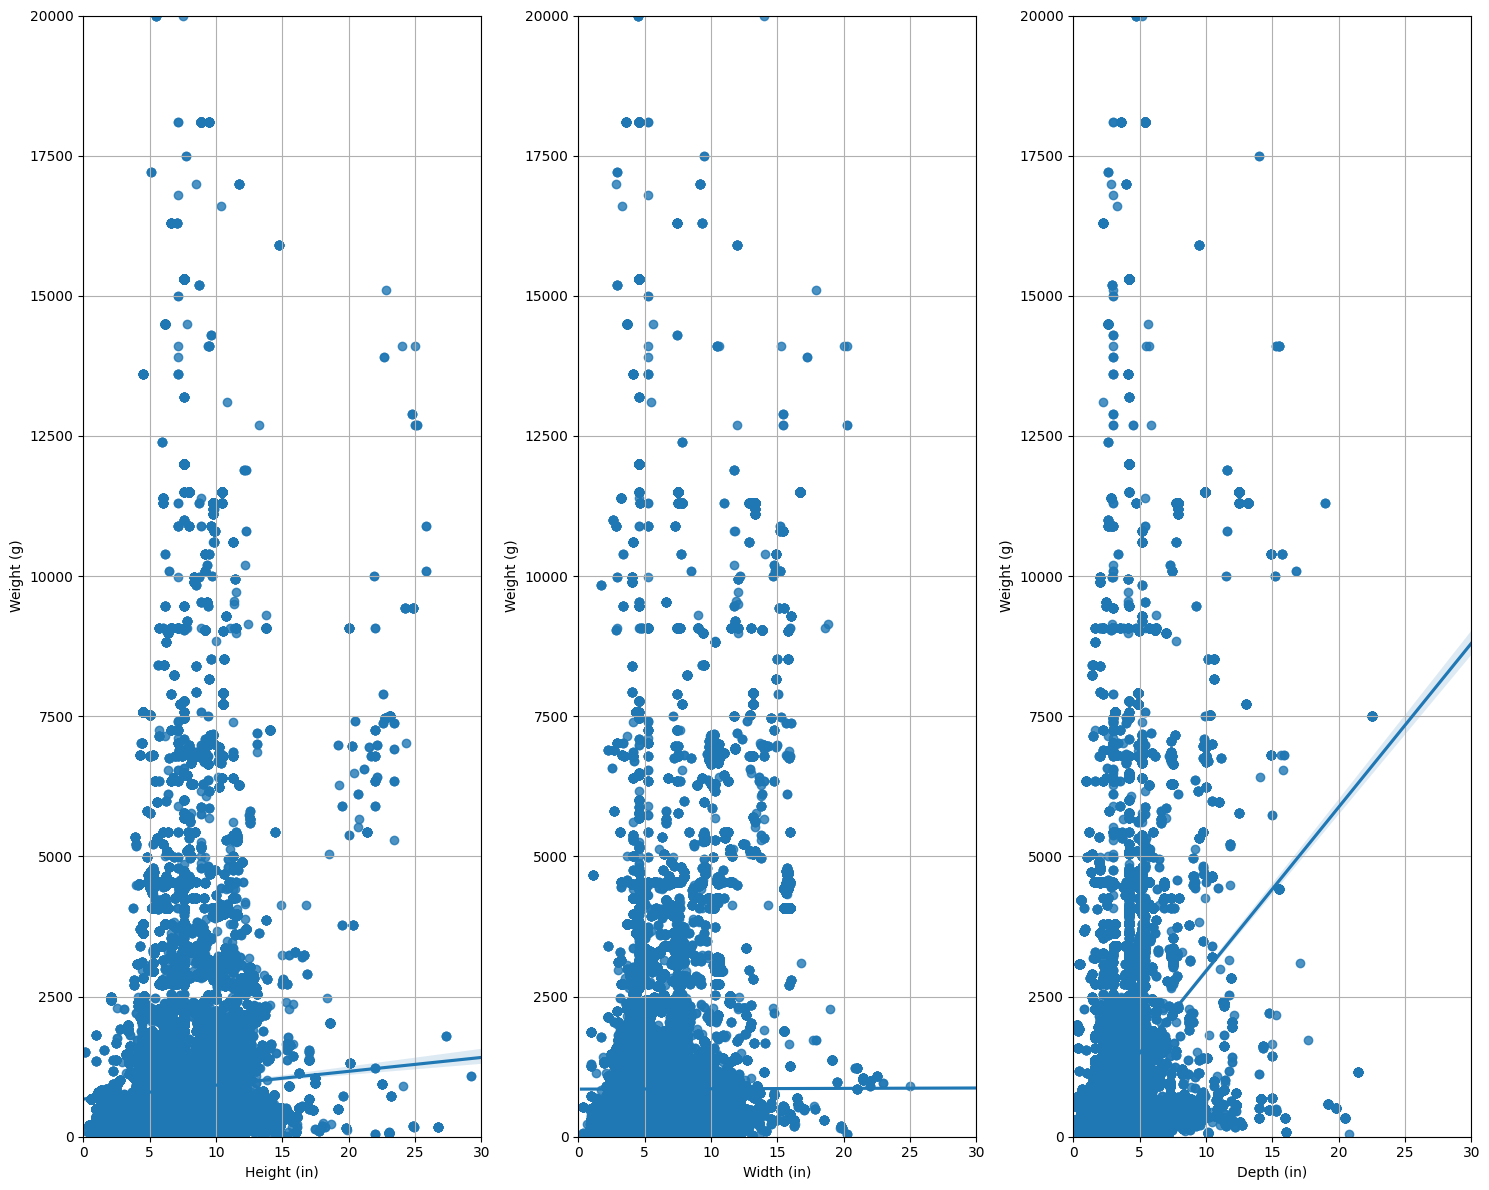

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15, 12))
sns.regplot(data = imputed, x = "HEIGHT_INCHES", y = "WEIGHT_GRAMS", ax = axs[0])
axs[0].set_xlabel(r"Height (in)")
axs[0].set_ylabel("Weight (g)")
axs[0].set_xlim(0, 30) 
axs[0].set_ylim(0, 20000)
axs[0].grid(True)
sns.regplot(data = imputed, x = "WIDTH_INCHES", y = "WEIGHT_GRAMS", ax = axs[1])
axs[1].set_xlabel(r"Width (in)")
axs[1].set_ylabel("Weight (g)")
axs[1].set_xlim(0,30)
axs[1].set_ylim(0, 20000)
axs[1].grid(True)
sns.regplot(data = imputed, x = "DEPTH_INCHES", y = "WEIGHT_GRAMS", ax = axs[2])
axs[2].set_xlabel(r"Depth (in)")
axs[2].set_ylabel("Weight (g)")
axs[2].set_xlim(0, 30)
axs[2].set_ylim(0, 20000)
axs[2].grid(True)
fig.tight_layout()
plt.show()

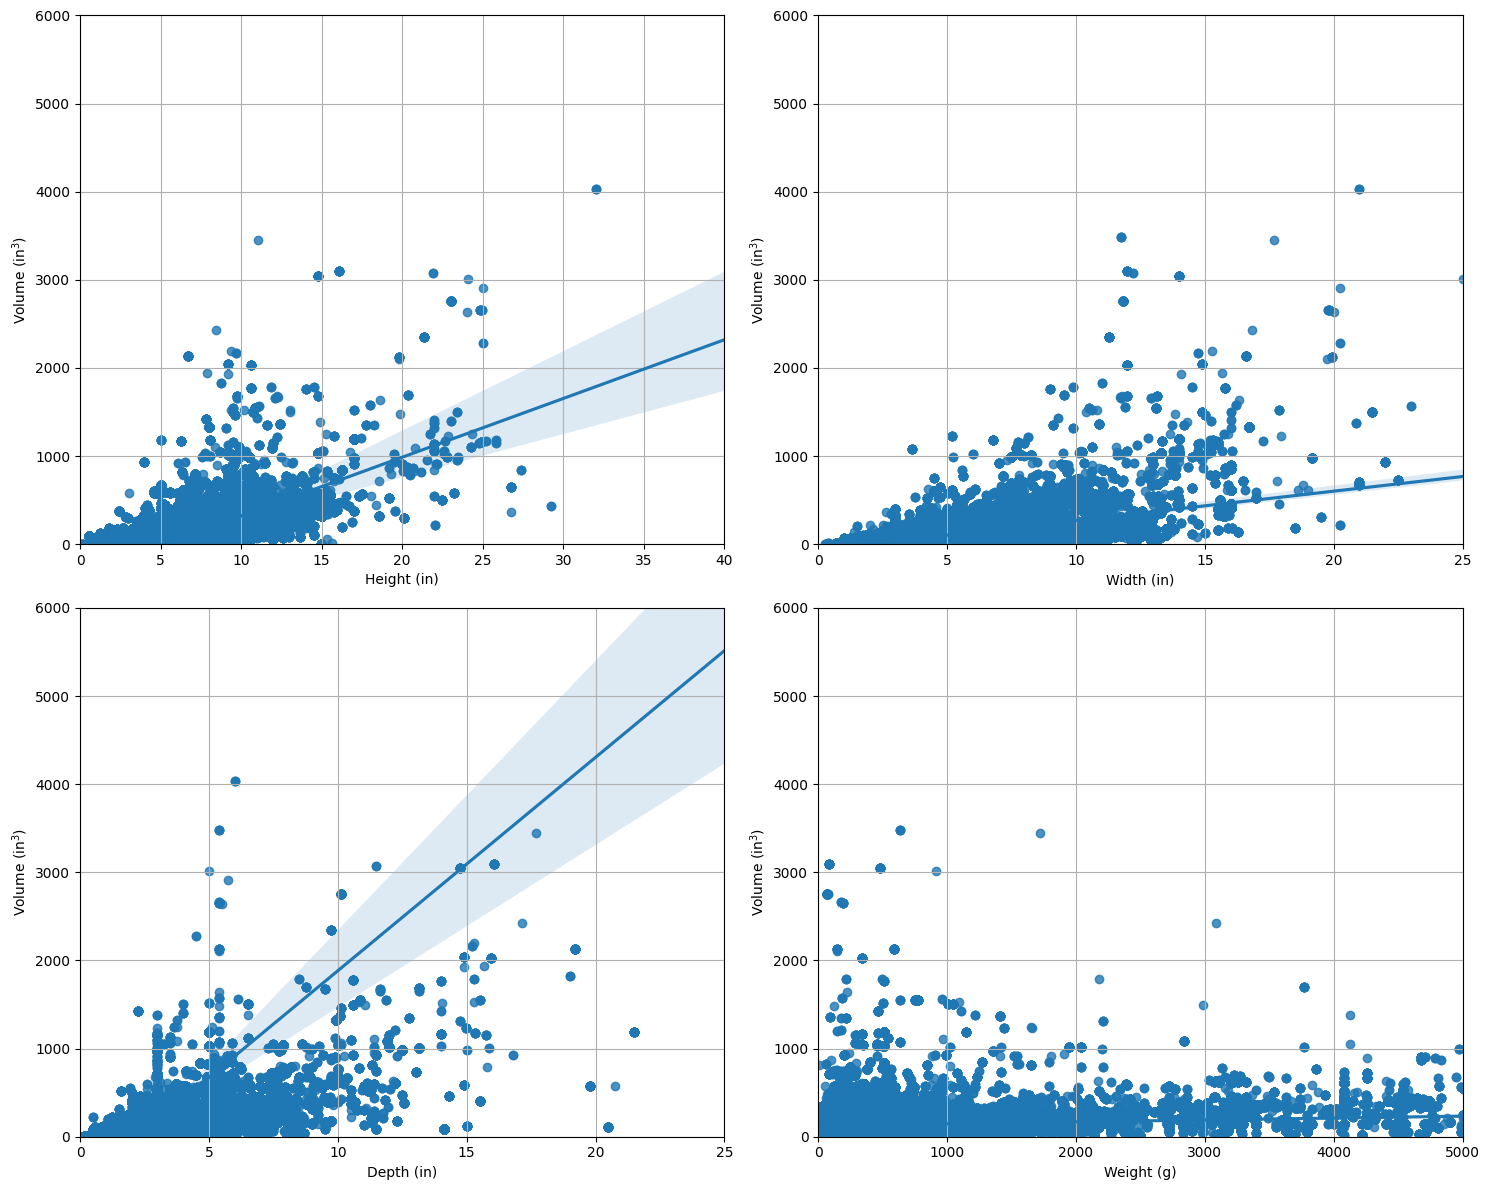

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
sns.regplot(data = imputed, x = "HEIGHT_INCHES", y = "VOLUME_INCHES", ax = axs[0, 0])
axs[0, 0].set_xlabel("Height (in)")
axs[0, 0].set_ylabel(r"Volume (in$^3$)")
axs[0, 0].set_xlim(0, 40) 
axs[0, 0].set_ylim(0, 6000)
axs[0, 0].grid(True)
sns.regplot(data = imputed, x = "WIDTH_INCHES", y = "VOLUME_INCHES", ax = axs[0,1])
axs[0, 1].set_xlabel(r"Width (in)")
axs[0, 1].set_ylabel(r"Volume (in$^3$)")
axs[0, 1].set_xlim(0,25)
axs[0, 1].set_ylim(0, 6000)
axs[0, 1].grid(True)
sns.regplot(data = imputed, x = "DEPTH_INCHES", y = "VOLUME_INCHES", ax = axs[1,0])
axs[1, 0].set_xlabel(r"Depth (in)")
axs[1, 0].set_ylabel(r"Volume (in$^3$)")
axs[1, 0].set_xlim(0, 25)
axs[1, 0].set_ylim(0, 6000)
axs[1, 0].grid(True)
sns.regplot(data = imputed, x = "WEIGHT_GRAMS", y = "VOLUME_INCHES", ax = axs[1,1])
axs[1, 1].set_xlabel("Weight (g)")
axs[1, 1].set_ylabel(r"Volume (in$^3$)")
axs[1, 1].set_xlim(0, 5000) 
axs[1, 1].set_ylim(0, 6000)
axs[1, 1].grid(True)
fig.tight_layout()
plt.show()

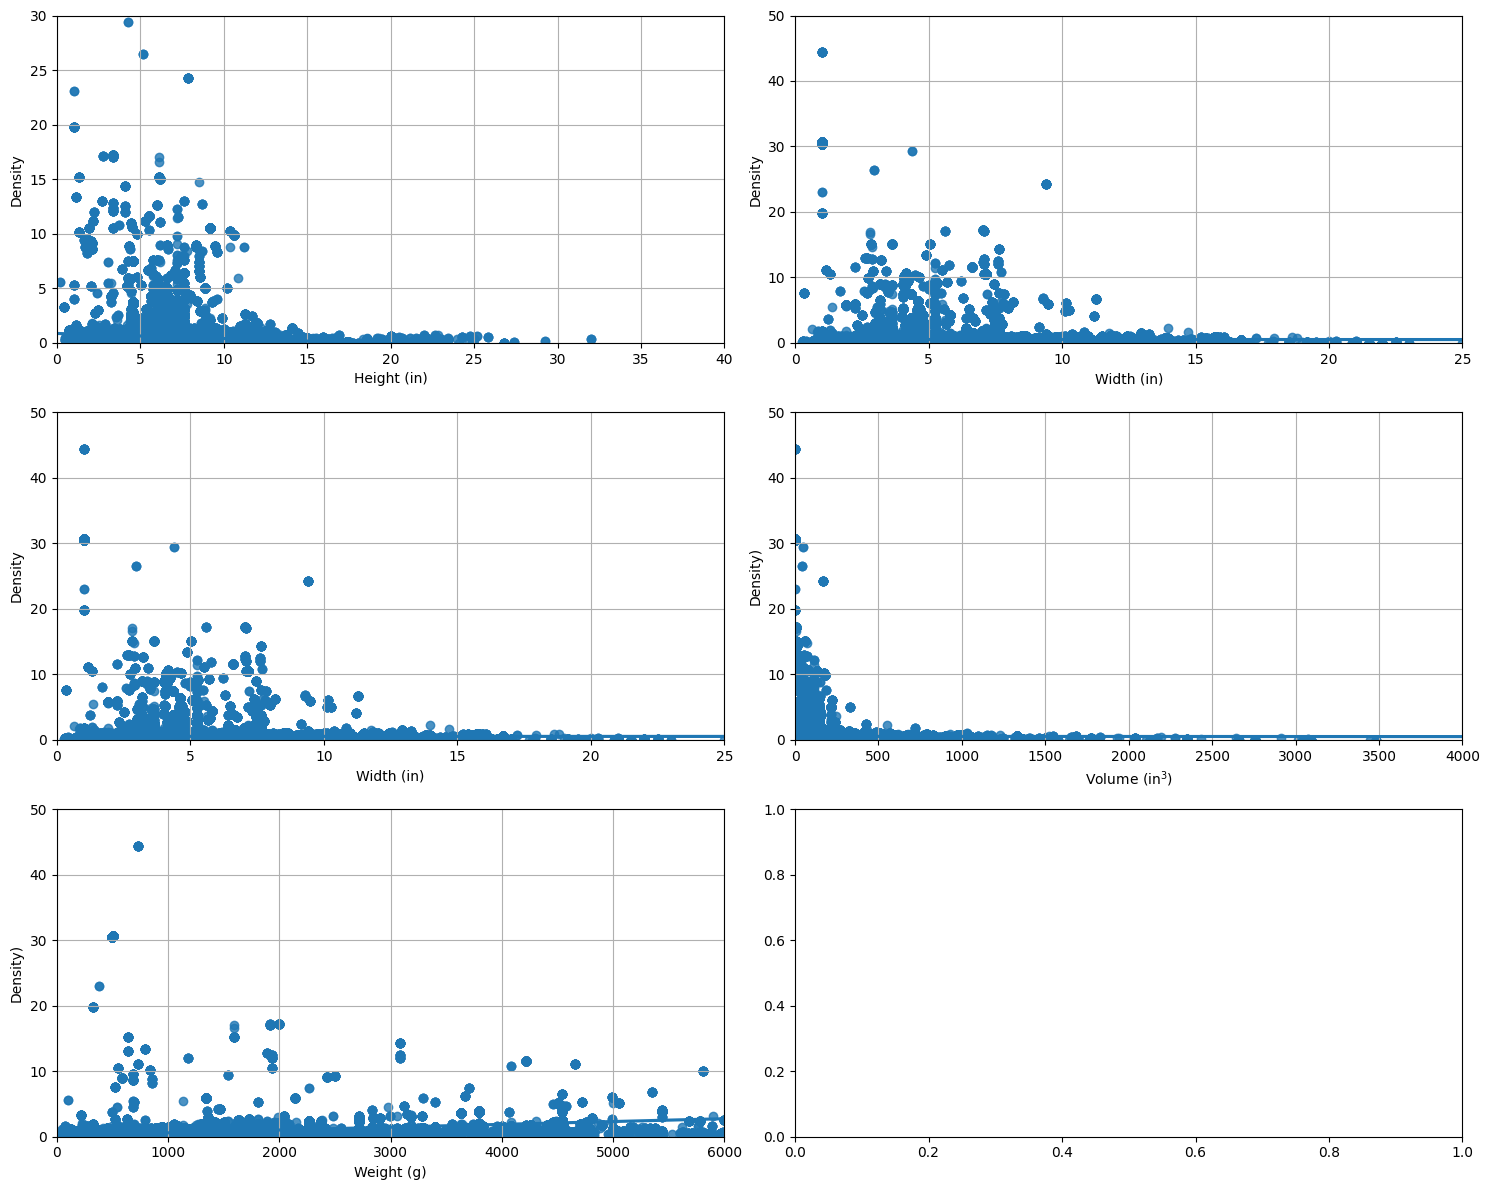

In [44]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))


sns.regplot(data = imputed, x = "HEIGHT_INCHES", y = "DENSITY", ax = axs[0, 0])
axs[0, 0].set_xlabel(r"Height (in)")
axs[0, 0].set_ylabel("Density")
axs[0, 0].set_xlim(0, 40) 
axs[0, 0].set_ylim(0, 30)
axs[0, 0].grid(True)

sns.regplot(data = imputed, x = "WIDTH_INCHES", y = "DENSITY", ax = axs[0,1])
axs[0, 1].set_xlabel(r"Width (in)")
axs[0, 1].set_ylabel("Density")
axs[0, 1].set_xlim(0,25)
axs[0, 1].set_ylim(0, 50)
axs[0, 1].grid(True)

sns.regplot(data = imputed, x = "WIDTH_INCHES", y = "DENSITY", ax = axs[1,0])
axs[1, 0].set_xlabel(r"Width (in)")
axs[1, 0].set_ylabel("Density")
axs[1, 0].set_xlim(0, 25)
axs[1, 0].set_ylim(0, 50)
axs[1, 0].grid(True)

sns.regplot(data = imputed, x = "VOLUME_INCHES", y = "DENSITY", ax = axs[1,1])
axs[1, 1].set_xlabel(r"Volume (in$^3$)")
axs[1, 1].set_ylabel("Density)")
axs[1, 1].set_xlim(0, 4000) 
axs[1, 1].set_ylim(0, 50)
axs[1, 1].grid(True)

sns.regplot(data = imputed, x = "WEIGHT_GRAMS", y = "DENSITY", ax = axs[2,0])
axs[2, 0].set_xlabel("Weight (g)")
axs[2, 0].set_ylabel("Density)")
axs[2, 0].set_xlim(0, 6000) 
axs[2, 0].set_ylim(0, 50)
axs[2, 0].grid(True)

fig.tight_layout()
plt.show()

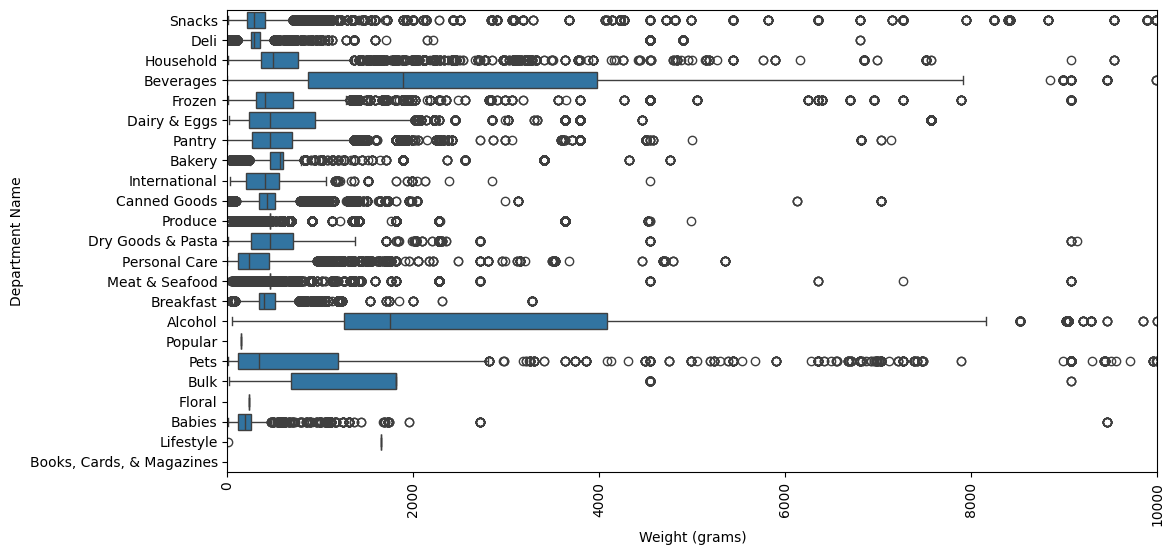

In [45]:
plt.figure(figsize = (12,6))
plt.xlim(0, 10000) # ignoring outliers, getting a closer look at the boxes
sns.boxplot(data = imputed, x = "WEIGHT_GRAMS", y = "DEPARTMENT_NAME")
plt.xticks(rotation=90)
plt.ylabel("Department Name")
plt.xlabel("Weight (grams)")
plt.show()

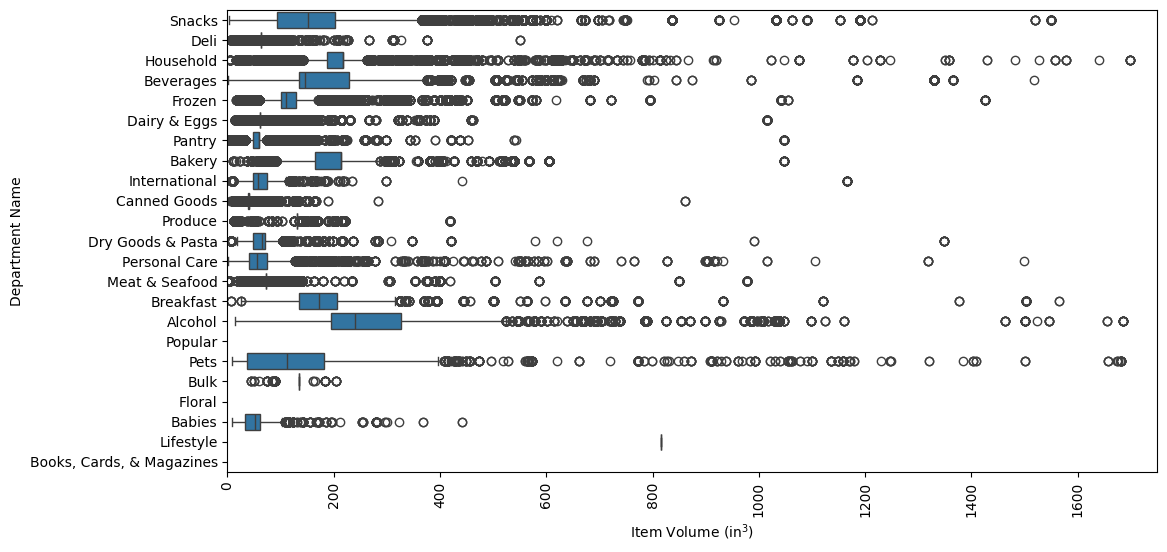

In [46]:
plt.figure(figsize = (12,6))

sns.boxplot(data = imputed, x = "VOLUME_INCHES", y = "DEPARTMENT_NAME")
plt.xlim(0, 1750) # ignoring outliers, getting a closer look at the boxes
plt.xticks(rotation=90)
plt.ylabel("Department Name")
plt.xlabel(r"Item Volume (in$^3$)")
plt.show()

# Log Transform for Outliers

We have clearly seen that the distributions of each of the numeric variables are not very close to any known distribution and are very skewed in many cases. How would a log transformation to some of those columns affect some relationships?

# Log Height, Width, Depth 

In [47]:
product_purchase["LOG_HEIGHT"] = np.log(product_purchase["HEIGHT_INCHES"])
product_purchase["LOG_WIDTH"] = np.log(product_purchase["WIDTH_INCHES"])
product_purchase["LOG_DEPTH"] = np.log(product_purchase["DEPTH_INCHES"])
product_purchase["LOG_WEIGHT"] = np.log(product_purchase["WEIGHT_GRAMS"])

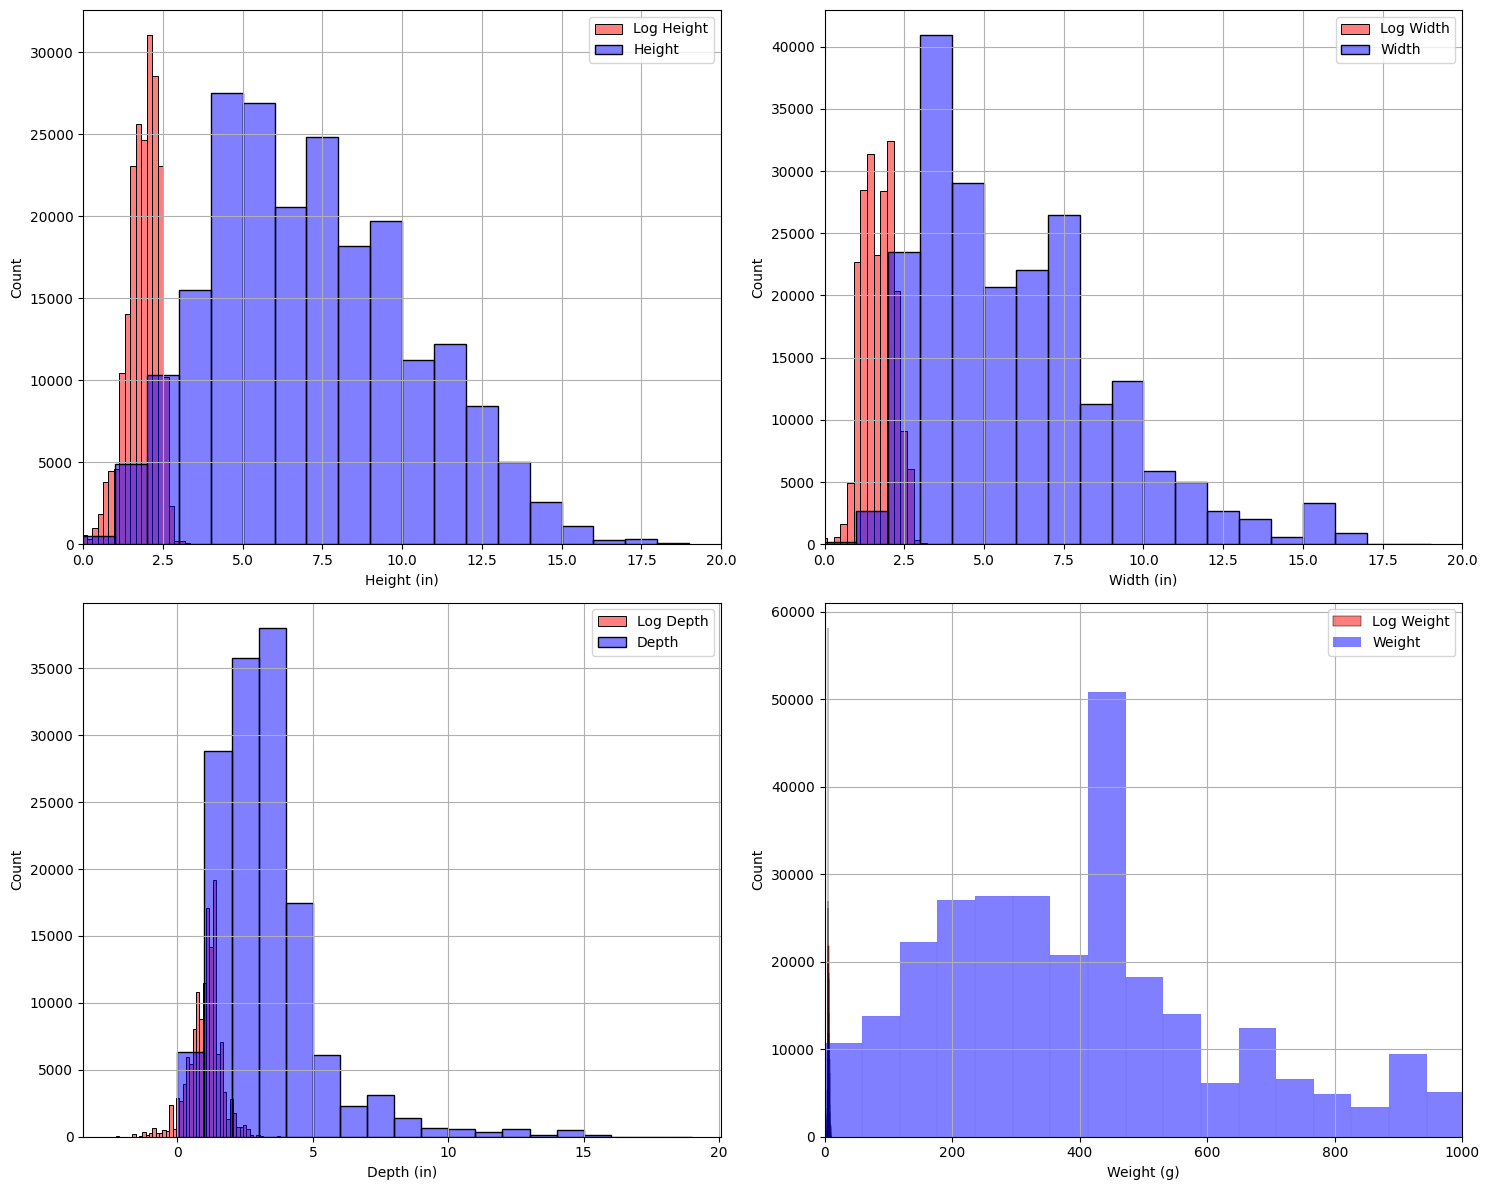

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

sns.histplot(data=product_purchase, x="LOG_HEIGHT", kde=False, bins=50, ax=axs[0,0], color='red', alpha=0.5, label='Log Height')
sns.histplot(data=product_purchase, x="HEIGHT_INCHES", kde=False, bins=range(0, 20), ax=axs[0, 0], color='blue', alpha=0.5, label='Height')
axs[0,0].set_xlim(0,20)
axs[0,0].set_xlabel("Height (in)")
axs[0,0].legend()
axs[0,0].grid(True)

sns.histplot(data=product_purchase, x="LOG_WIDTH", kde=False, bins=50, ax=axs[0,1], color='red', alpha=0.5, label='Log Width')
sns.histplot(data=product_purchase, x="WIDTH_INCHES", kde=False, bins=range(0, 20), ax=axs[0,1], color='blue', alpha=0.5, label='Width')
axs[0,1].set_xlim(0,20)
axs[0,1].set_xlabel("Width (in)")
axs[0,1].legend()
axs[0,1].grid(True)

sns.histplot(data=product_purchase, x="LOG_DEPTH", kde=False, bins=50, ax=axs[1,0], color="red", alpha=0.5, label="Log Depth")
sns.histplot(data=product_purchase, x="DEPTH_INCHES", kde=False, bins=range(0, 20), ax=axs[1,0], color='blue', alpha=0.5, label='Depth')
axs[1,0].set_xlabel("Depth (in)")
axs[1,0].legend()
axs[1,0].grid(True)

sns.histplot(data=product_purchase, x="LOG_WEIGHT", kde=False, bins=100, ax=axs[1,1], color="red", alpha=0.5, label="Log Weight")
sns.histplot(data=product_purchase, x="WEIGHT_GRAMS", bins=2000, kde=False, ax=axs[1,1], color="blue", alpha=0.5, label="Weight")
axs[1,1].set_xlim(0,1000)
axs[1,1].set_xlabel("Weight (g)")
axs[1,1].legend()
axs[1,1].grid(True)

fig.tight_layout()
plt.show()

From the plots it is clear that we have shrank down the data in all dimensions, especially weight. The data is significantly more normalized, and there are far fewer outliers.

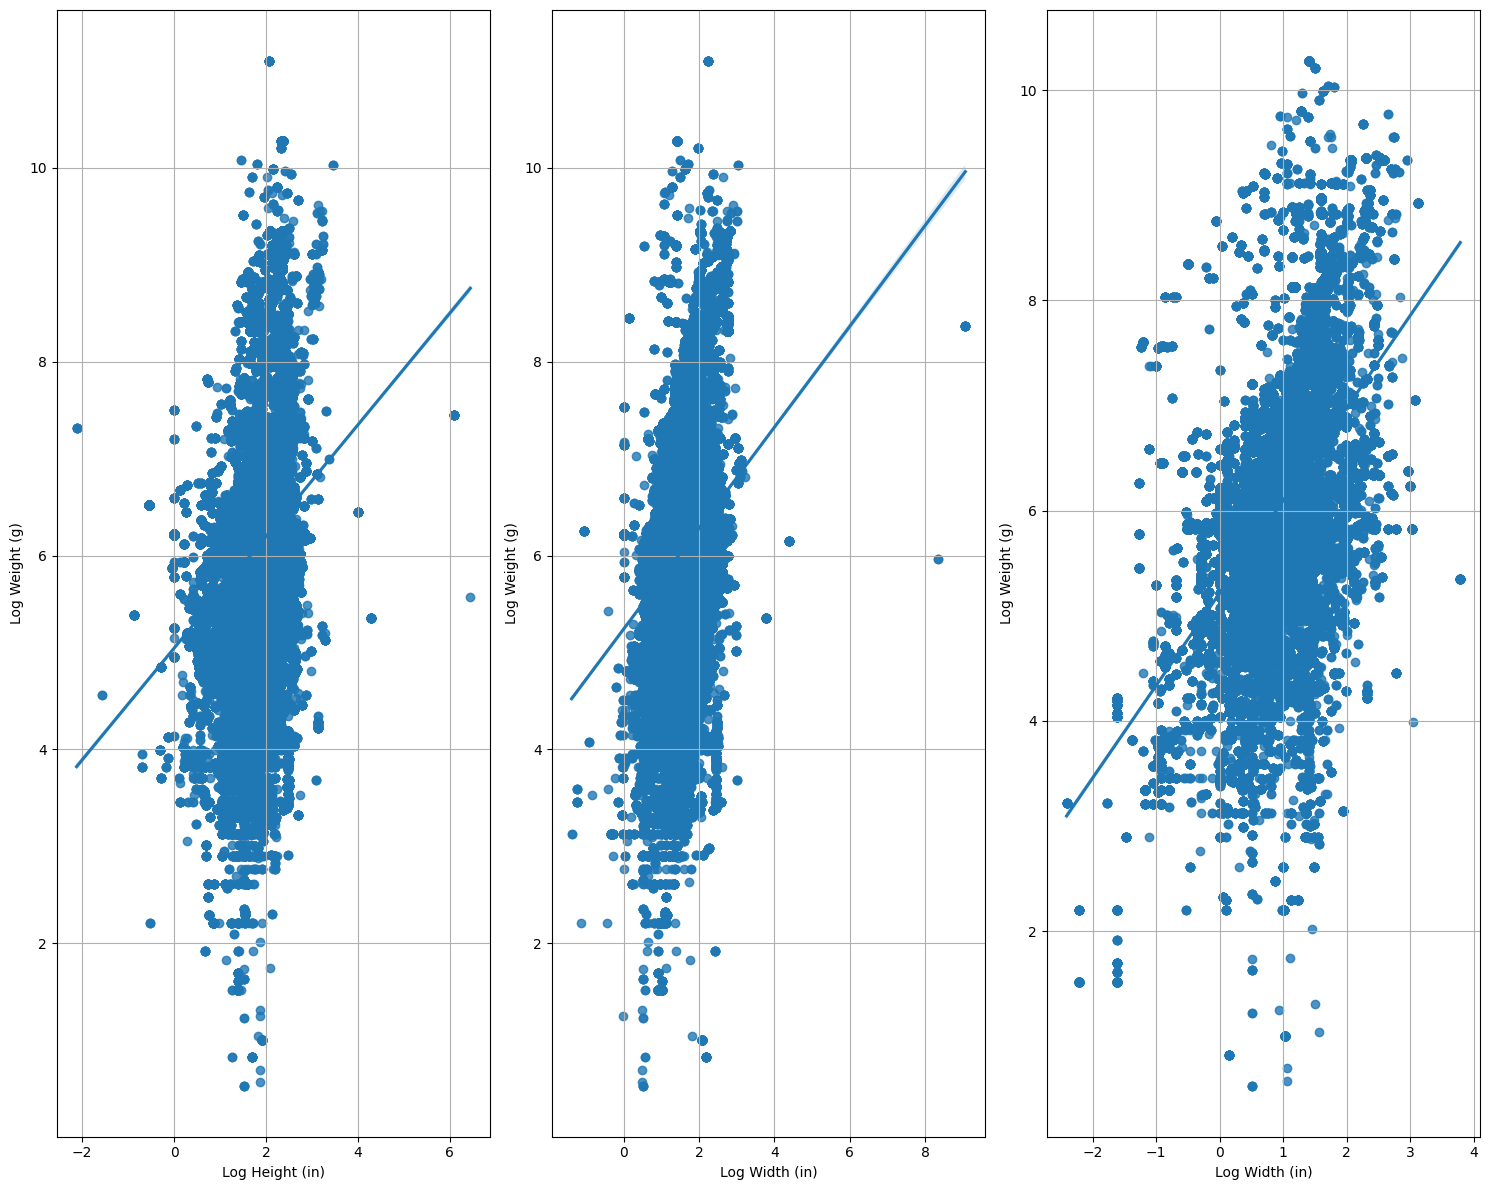

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

sns.regplot(data = product_purchase, x = "LOG_HEIGHT", y = "LOG_WEIGHT", ax = axs[0])
axs[0].set_xlabel(r"Log Height (in)")
axs[0].set_ylabel("Log Weight (g)")
axs[0].grid(True)

sns.regplot(data = product_purchase, x = "LOG_WIDTH", y = "LOG_WEIGHT", ax = axs[1])
axs[1].set_xlabel(r"Log Width (in)")
axs[1].set_ylabel("Log Weight (g)")
axs[1].grid(True)

sns.regplot(data = product_purchase, x = "LOG_DEPTH", y = "LOG_WEIGHT", ax = axs[2])
axs[2].set_xlabel(r"Log Width (in)")
axs[2].set_ylabel("Log Weight (g)")
axs[2].grid(True)

fig.tight_layout()
plt.show()

In [222]:
product_purchase[['LOG_HEIGHT', 'LOG_WIDTH', 'LOG_DEPTH', 'LOG_WEIGHT']].describe()

LOG_HEIGHT      LOG_WIDTH      LOG_DEPTH     LOG_WEIGHT
count  210467.000000  210437.000000  142439.000000  357750.000000
mean        1.858068       1.673621       1.012607       6.209460
std         0.510941       0.496202       0.602908       1.092150
min        -2.120264      -1.386294      -2.407946      -4.422849
25%         1.532557       1.294727       0.693147       5.620401
50%         1.930071       1.673351       1.098612       6.118097
75%         2.226783       2.030776       1.360977       6.810142
max         6.447306       9.068546       3.784190      11.678440

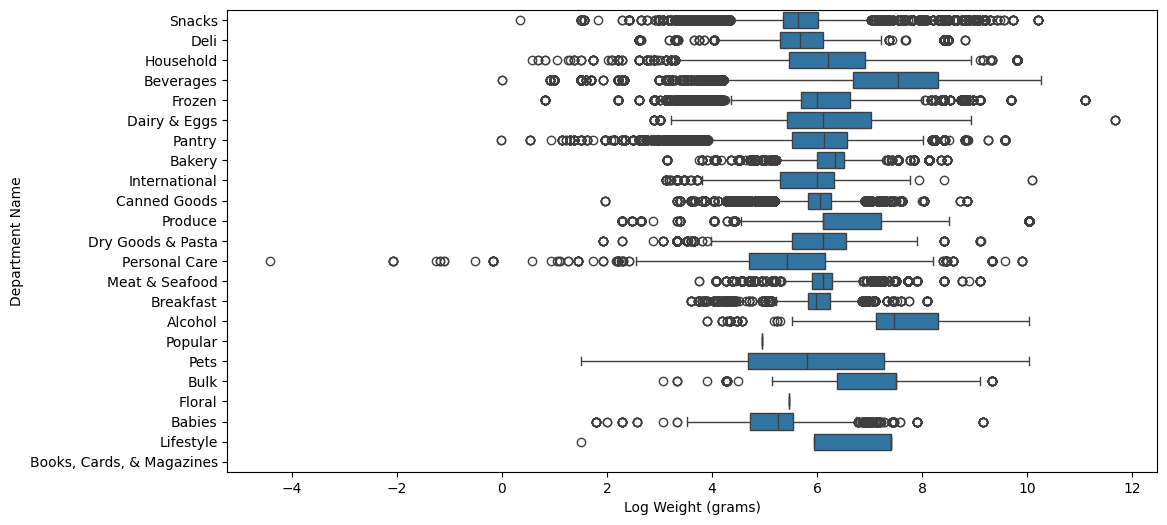

In [223]:
plt.figure(figsize = (12,6))
sns.boxplot(data = product_purchase, x = "LOG_WEIGHT", y = "DEPARTMENT_NAME")
plt.ylabel("Department Name")
plt.xlabel("Log Weight (grams)")
plt.show()

log transform helps a ton with bringing in outliers, we no longer have points greater than 13.

/var/folders/9n/g5k1cmzn6nx6v2rpxk3rcksw0000gn/T/ipykernel_60998/1983129808.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


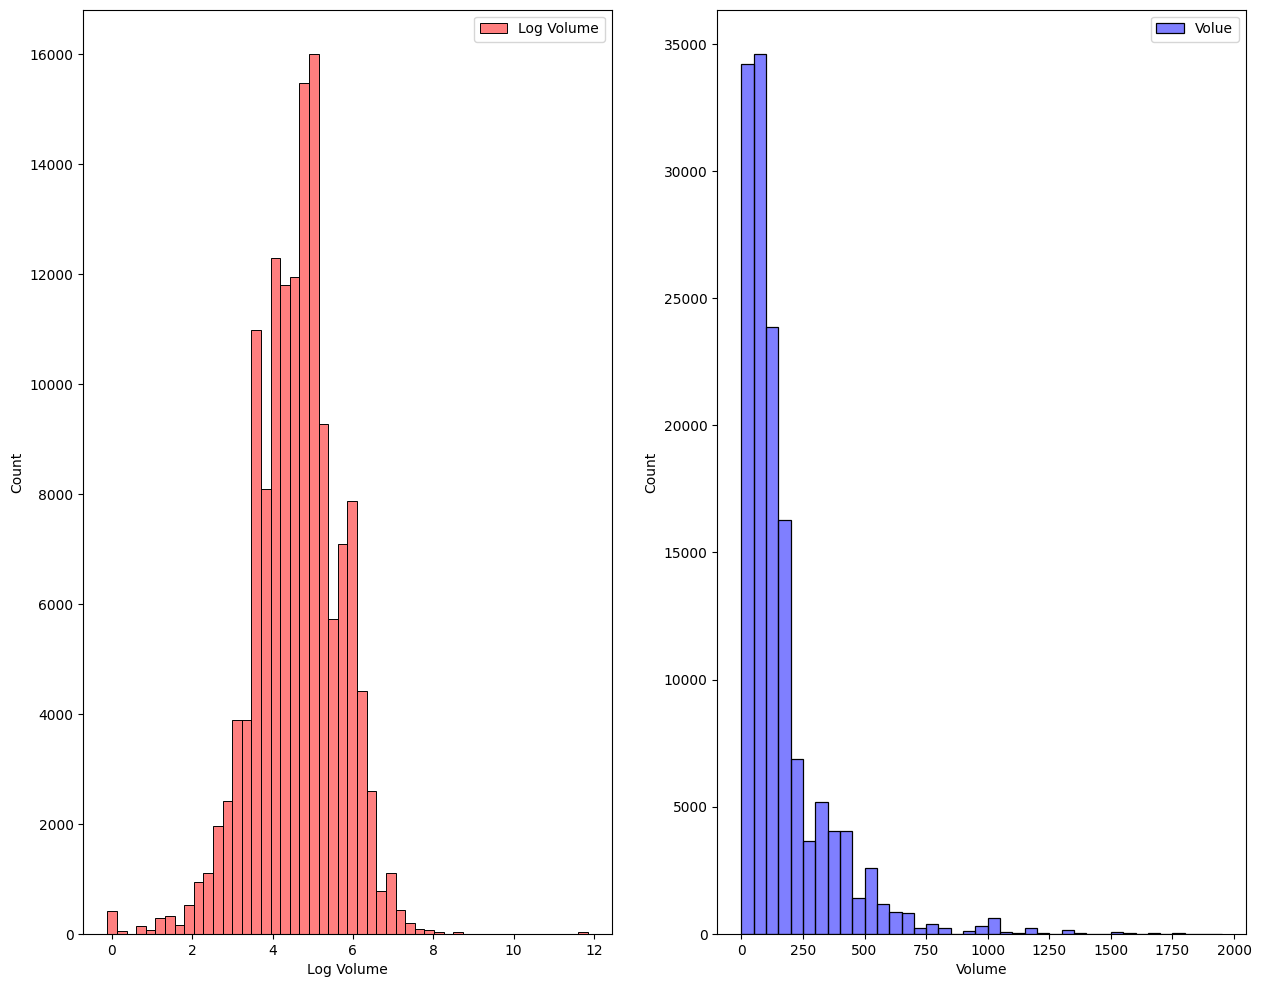

In [52]:
product_purchase["LOG_VOLUME"] = np.log(product_purchase["VOLUME_INCHES"])

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

sns.histplot(data=product_purchase, x="LOG_VOLUME", bins=50, kde=False, color="red", alpha=0.5, label="Log Volume", ax=axs[0])
sns.histplot(data=product_purchase, x="VOLUME_INCHES", bins=range(0,2000,50), kde=False, color="blue", alpha=0.5, label="Volue", ax=axs[1])
axs[0].set_xlabel("Log Volume")
axs[1].set_xlabel("Volume")
axs[0].legend()
axs[1].legend()
fig.show()

From this plot it is very clear that we have shrunk down our volume and nearly removed any skew.

/var/folders/9n/g5k1cmzn6nx6v2rpxk3rcksw0000gn/T/ipykernel_60998/469248844.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


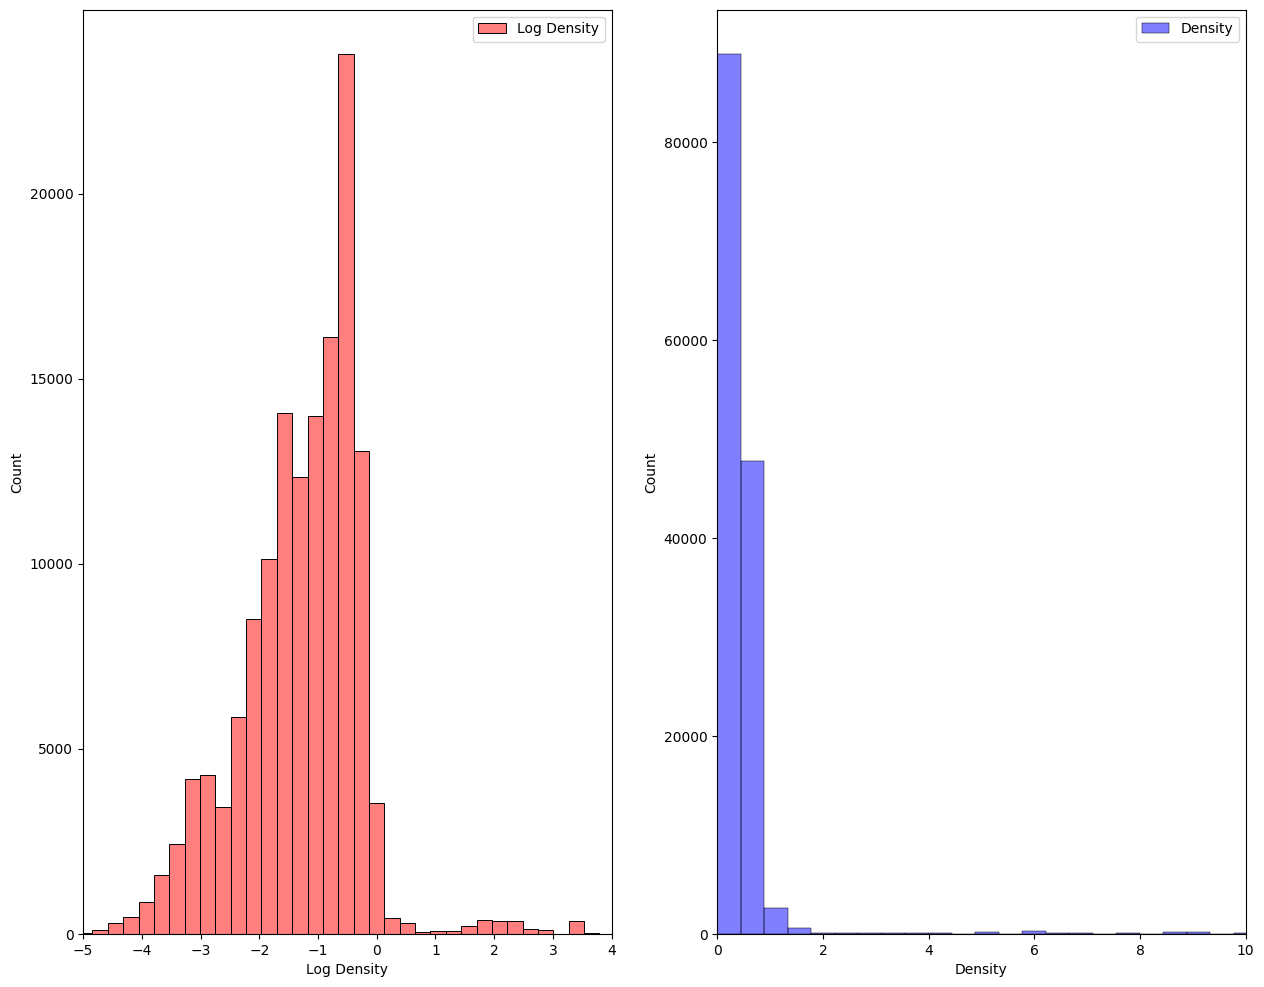

In [53]:
product_purchase["LOG_DENSITY"] = np.log(product_purchase["DENSITY"])

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

sns.histplot(data=product_purchase, x="LOG_DENSITY", bins=50, kde=False, color="red", ax=axs[0], alpha=.5, label="Log Density")
sns.histplot(data=product_purchase, x="DENSITY", bins=100, kde=False, color="blue", ax=axs[1], alpha=0.5, label="Density")
axs[0].set_xlabel("Log Density")
axs[1].set_xlabel("Density")
axs[0].set_xlim(-5, 4)
axs[1].set_xlim(0,10)
axs[0].legend()
axs[1].legend()
fig.show()

taking the log of volume and density significantly helps with the skewness of the data, and much more closely resembles something similar to a normal

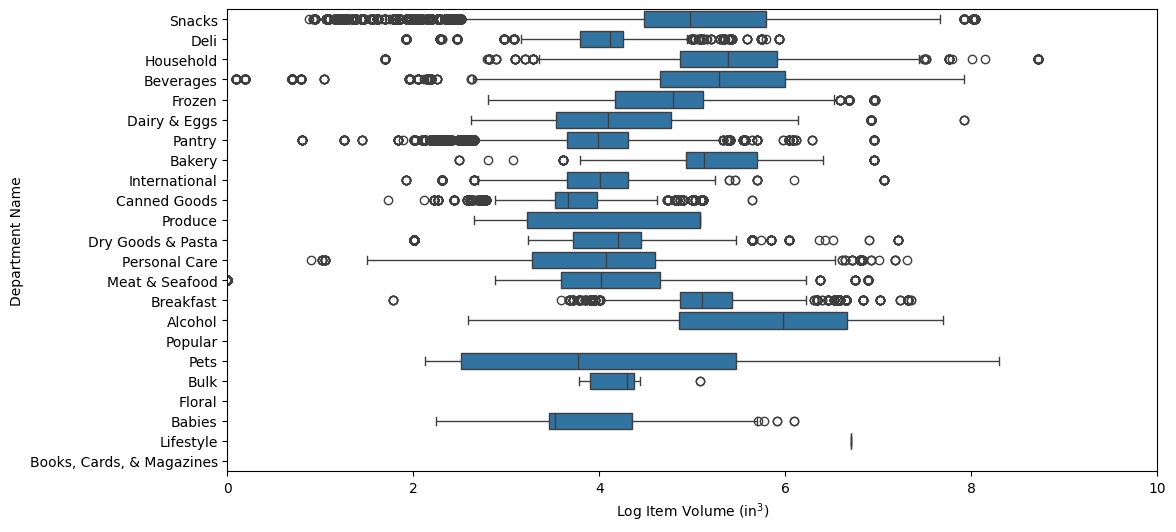

In [54]:
plt.figure(figsize = (12,6))

sns.boxplot(data = product_purchase, x = "LOG_VOLUME", y = "DEPARTMENT_NAME")
plt.xlim(0,10)
plt.ylabel("Department Name")
plt.xlabel(r"Log Item Volume (in$^3$)")
plt.show()

box plot looks much cleaner, compared to all of the outliers from earlier. all of the data is centered from 0 to 12.

# Imputing Log Values

Now that we have seen that log values have much better shape and can be used more easily, let's impute those log values and do the rest of the analysis on those.

In [55]:
log_dep_dims = product_purchase[["DEPARTMENT_NAME", "LOG_HEIGHT", "LOG_WIDTH", "LOG_DEPTH", "LOG_WEIGHT", "LOG_VOLUME", "LOG_DENSITY"]]
log_dep_medians = log_dep_dims.groupby("DEPARTMENT_NAME").transform("median")

# imputing with the median of each department
log_imputed = product_purchase.copy()
log_imputed["LOG_HEIGHT"] = log_imputed["LOG_HEIGHT"].fillna(log_dep_medians["LOG_HEIGHT"])
log_imputed["LOG_WIDTH"] = log_imputed["LOG_WIDTH"].fillna(log_dep_medians["LOG_WIDTH"])
log_imputed["LOG_DEPTH"] = log_imputed["LOG_DEPTH"].fillna(log_dep_medians["LOG_DEPTH"])
log_imputed["LOG_WEIGHT"] = log_imputed["LOG_WEIGHT"].fillna(log_dep_medians["LOG_WEIGHT"])
log_imputed["LOG_VOLUME"] = log_imputed["LOG_VOLUME"].fillna(log_dep_medians["LOG_VOLUME"])
log_imputed["LOG_DENSITY"] = log_imputed["LOG_DENSITY"].fillna(log_dep_medians["LOG_DENSITY"])

In [56]:
log_imputed = log_imputed[["PURCHASE_ID", "PRODUCT_ID", "QUANTITY", "PURCHASE_DATE_TIME", "DEPARTMENT_NAME", 
                           "PURCHASE_DATE", "PURCHASE_TIME", "DAY_OF_WEEK", "LOG_HEIGHT", "LOG_WIDTH", "LOG_DEPTH",
                           "LOG_WEIGHT", "LOG_VOLUME", "LOG_DENSITY"]]

<Axes: >

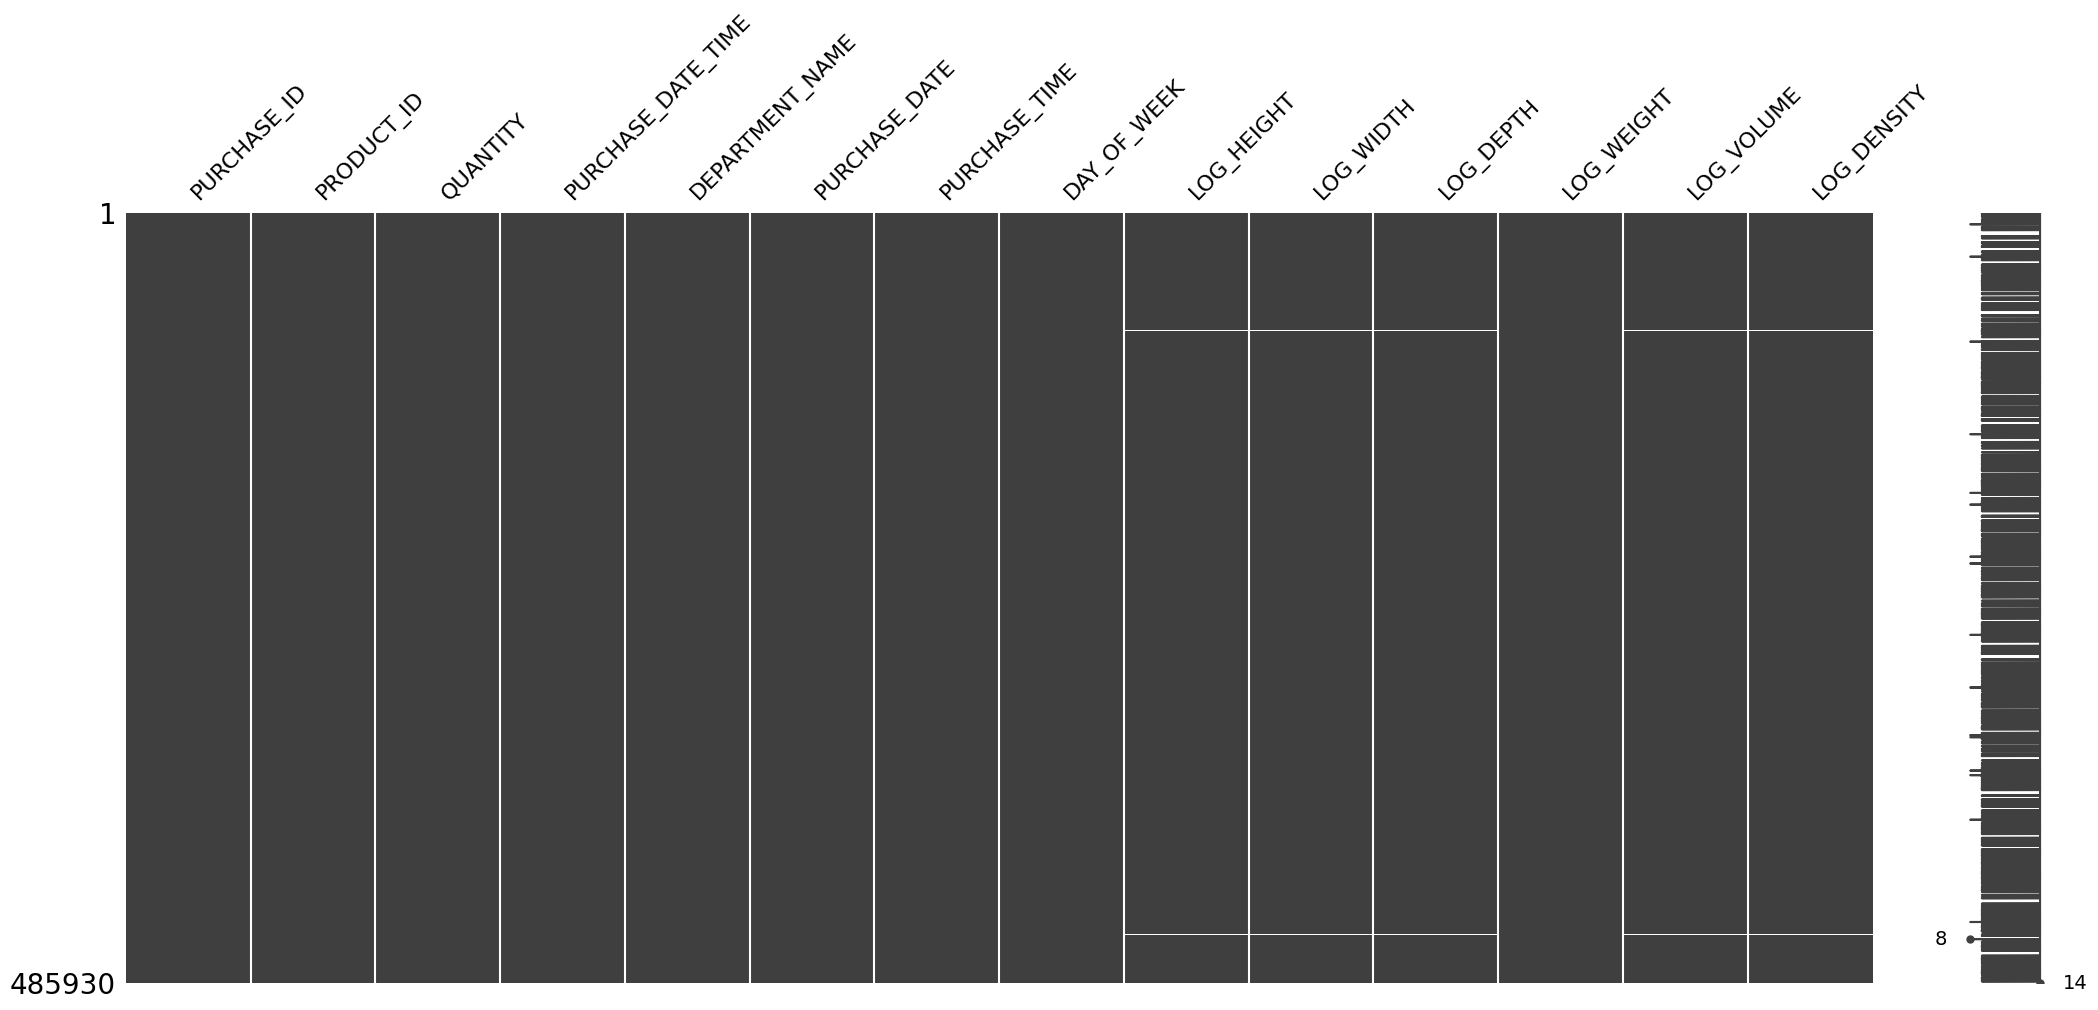

In [57]:
msno.matrix(log_imputed)

In [58]:
# some missing data, but significantly less than before
log_imputed.isna().sum() 

PURCHASE_ID             0
PRODUCT_ID              0
QUANTITY                0
PURCHASE_DATE_TIME      0
DEPARTMENT_NAME         0
PURCHASE_DATE           0
PURCHASE_TIME           0
DAY_OF_WEEK             0
LOG_HEIGHT            787
LOG_WIDTH             787
LOG_DEPTH             787
LOG_WEIGHT             17
LOG_VOLUME            787
LOG_DENSITY           787
dtype: int64

# Correlation Matrix of Numerical Columns

seeing how numeric columns are correlated with each other, and where we can possibly avoid multicollinearity down the road

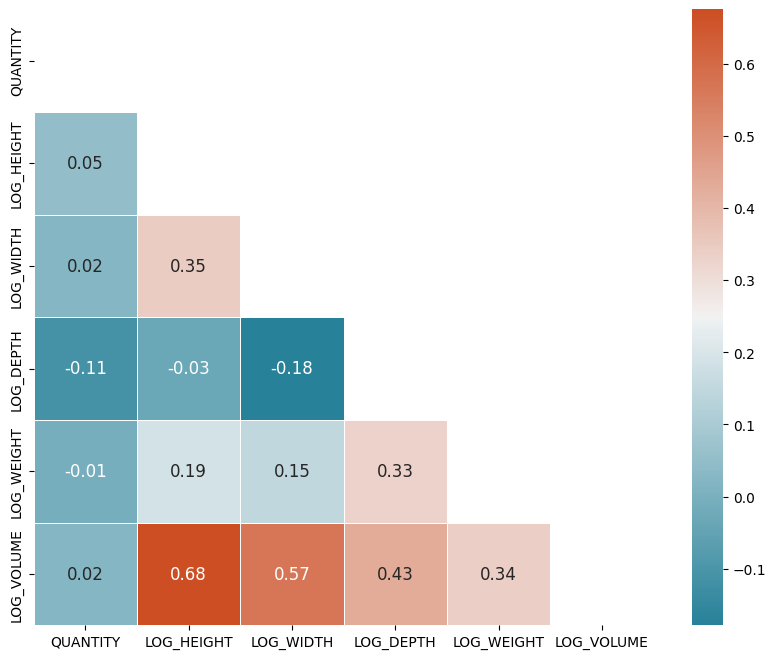

In [59]:
numeric = log_imputed[["QUANTITY", "LOG_HEIGHT", "LOG_WIDTH", "LOG_DEPTH", "LOG_WEIGHT", "LOG_VOLUME"]]
correlation_matrix = numeric.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

custom_palette = sns.diverging_palette(220, 20, as_cmap=True, s=90, l=50)
custom_palette.set_bad('white')

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = custom_palette, fmt = ".2f", 
            linewidths = 0.5, mask=mask, annot_kws={"size": 12})
plt.show()

There really only seems to be correlation to `LOG_VOLUME`, which makes sense because it is calculated from `LOG_HEIGHT`, `LOG_WIDTH` and `LOG_DEPTH`.

# Market Basket Analysis: Apriori Algorithm

Seeing how certain departments are associated with each other based on order data. I'm not sure if the data provided here is customer data or what grocery stores buy from suppliers, but if it were customer data then there could be some helpful information about the layout of stores so robots do not have to travel as far to pick up highly associated items.

In [208]:
# grouping by order to find what departments they order most from
basket = log_imputed.groupby(['PURCHASE_ID', 'DEPARTMENT_NAME'])["QUANTITY"].sum().unstack().reset_index().fillna(0).set_index('PURCHASE_ID')

# encoding the basket
def hot_encode(x): 
    if(x<= 0): 
        return True
    if (x > 0): 
        return False
    
basket_encoded = basket.map(hot_encode)
basket = basket_encoded

# applying the model
frq_items = apriori(basket, min_support=.6, use_colnames=True)
rules = association_rules(frq_items, metric='lift', min_threshold=1)

# filtering to find one-to-one relationships between departments
one_to_one = rules[(rules['antecedents'].apply(lambda x: len(x) == 1)) & 
                         (rules['consequents'].apply(lambda x: len(x) == 1))]

matching_pairs = []

for consequent in one_to_one["consequents"].unique():
    consequent_df = one_to_one[one_to_one["consequents"] == consequent]
    antecedents = consequent_df["antecedents"].unique()

    for antecedent in antecedents:
        antecedent_df = one_to_one[one_to_one["antecedents"] == antecedent]
        for index, row in antecedent_df.iterrows():
            if row['consequents'] == consequent:
                matching_pairs.append((consequent, antecedent))

matching_consequents = set(pair[0] for pair in matching_pairs)
matching_antecedents = set(pair[1] for pair in matching_pairs)

two_way = one_to_one[
    (one_to_one['consequents'].isin(matching_consequents)) & 
    (one_to_one['antecedents'].isin(matching_antecedents))
]

two_way = two_way.sort_values(['confidence', 'lift'], ascending=[False, False])
high_conf = two_way[two_way["confidence"] >= .95]
high_conf.head()

antecedents                  consequents  antecedent support  \
34           (Household)  (Books, Cards, & Magazines)            0.702738   
102      (Personal Care)                  (Lifestyle)            0.733169   
66                (Deli)                  (Lifestyle)            0.601400   
71   (Dry Goods & Pasta)                  (Lifestyle)            0.707350   
49           (Breakfast)                  (Lifestyle)            0.740086   

     consequent support   support  confidence      lift  leverage  conviction  \
34             0.999300  0.702532    0.999707  1.000407  0.000286    2.389310   
102            0.999218  0.732880    0.999607  1.000390  0.000285    1.990029   
66             0.999218  0.601112    0.999521  1.000303  0.000182    1.632372   
71             0.999218  0.706980    0.999476  1.000259  0.000183    1.493295   
49             0.999218  0.739675    0.999444  1.000226  0.000167    1.406164   

     zhangs_metric  
34        0.001370  
102       0.001459  
66        0.000761  
71        0.000884  
49        0.000870

The confidence value in this table represents the probability that one department is present if another one is present. For example, the top value of the table is household and books, cards and magazines, and the confidence value  is 0.999707. This means that 99.97% of the orders that contain household values also contain a books, cards and magazines item.

If this is customer data, then we can take this data to help change the layout of a store, placing the household department next to books, cards and magazines. Therefore the robots will not have to travel as far and we can save energy. 

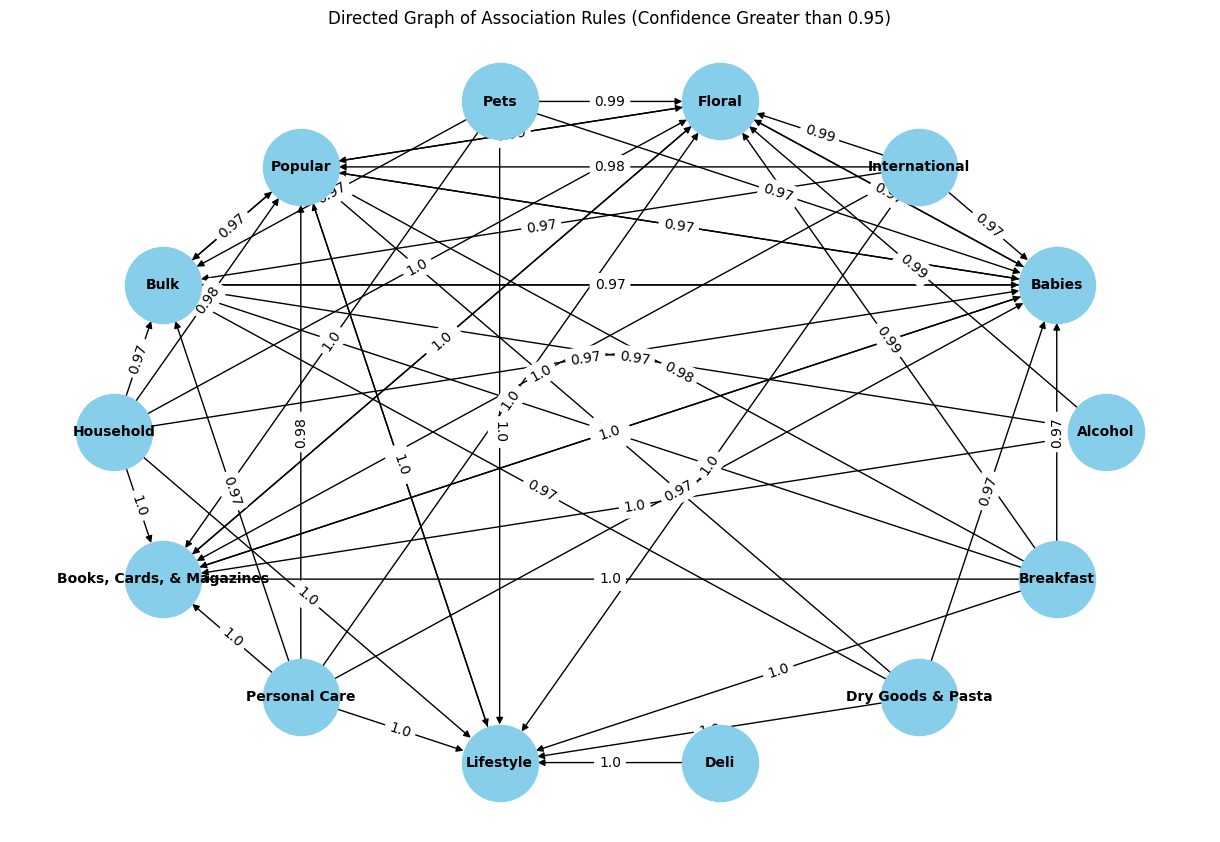

In [218]:
G = nx.DiGraph()

for _, row in high_conf.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    confidence = round(row['confidence'], 2)
    
    G.add_edge(antecedent, consequent, weight=confidence)

pos = nx.shell_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Directed Graph of Association Rules (Confidence Greater than 0.95)')
plt.show()

Here are the most highly associated departments (confidence >= .95), meaning that orders with one department are highly more likely to contain orders from another department. These are all two-way relationships, but I was having some issues making sure that all the arrows were in two directions.

# Exporting Log Imputed Data For Possible Machine Learning Models

In [220]:
log_imputed.to_csv("log_imputed_product_purchase.csv", index=False)